In [2]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/instquality/")

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/instquality/")

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from functions.utils import prep_target

df = pd.read_pickle("files/inst.dat")
df = prep_target(df)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Fixes in post

In [ ]:
df["p5d_trans_indicator"] = np.select(
    [df["p5d_polity"] == -77,  # interregnum, mark as 1
     df["p5d_polity"] == -88,  # transition, mark as 2
     df["p5d_polity"] == -99   # foreign interruption, mark as 3
    ], [1, 2, 3],  # codes for each case
    default=0   # normal years
)

p5d_cols = [c for c in df.columns if c.startswith(f"p5d_")]
df[p5d_cols] = df[p5d_cols].replace([-99, -88, -77], np.nan) # replace the values

## Institutional quality variables

In [ ]:
prefixes = ["efw", "fiw", "ief", "p5d", "pts", "wgi", "wb", "tgt"]
col_counts = {p: sum(c.startswith(p + "_") for c in df.columns)
              for p in prefixes}

print("Number of variables per source:")
print(pd.Series(col_counts).astype(int).to_string())

Number of variables per source:
efw    79
fiw    15
ief    13
p5d    17
pts     6
wgi    36
wb     48
tgt     1


In [ ]:
prefix = 'wb_iq'
cols = [c for c in df.columns if c.startswith(f"{prefix}_")]
print(f"Found {len(cols)} {prefix} columns:")
print("\n".join(cols))

Found 33 wb_iq columns:
wb_iq_cpa_breg_xq
wb_iq_cpa_debt_xq
wb_iq_cpa_econ_xq
wb_iq_cpa_envr_xq
wb_iq_cpa_finq_xq
wb_iq_cpa_fins_xq
wb_iq_cpa_fisp_xq
wb_iq_cpa_gndr_xq
wb_iq_cpa_hres_xq
wb_iq_cpa_irai_xq
wb_iq_cpa_macr_xq
wb_iq_cpa_padm_xq
wb_iq_cpa_pres_xq
wb_iq_cpa_prop_xq
wb_iq_cpa_prot_xq
wb_iq_cpa_pubs_xq
wb_iq_cpa_revn_xq
wb_iq_cpa_soci_xq
wb_iq_cpa_strc_xq
wb_iq_cpa_trad_xq
wb_iq_cpa_tran_xq
wb_iq_sci_mthd
wb_iq_sci_ovrl
wb_iq_sci_prdc
wb_iq_sci_srce
wb_iq_spi_ovrl
wb_iq_spi_pil1
wb_iq_spi_pil2
wb_iq_spi_pil3
wb_iq_spi_pil4
wb_iq_spi_pil5
wb_iq_wef_cust_xq
wb_iq_wef_port_xq


### Coverage

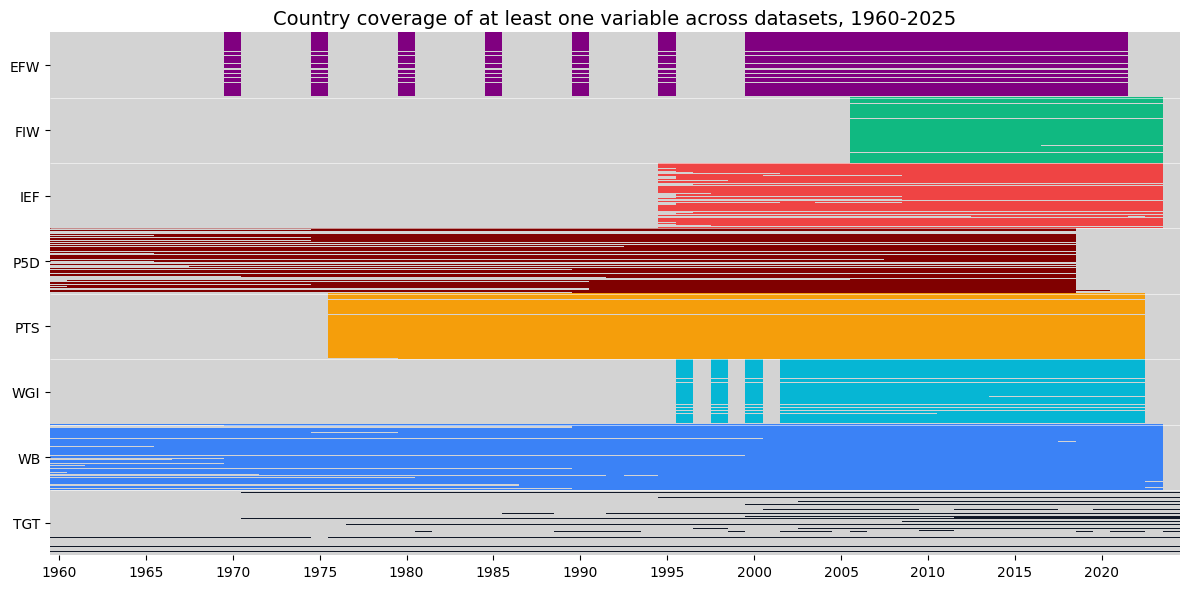

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Country coverage of at least one variable across datasets, 1960-2025'}>)

In [ ]:
from functions.plot import coverage_panel

prefixes = ["efw", "fiw", "ief", "p5d", "pts", "wgi", "wb", "tgt"]
coverage_panel(df, prefixes, start=1960, end=2024, missing_color='lightgrey')

# we can see target data is the bottleneck
# IQ data sources don't have much length though

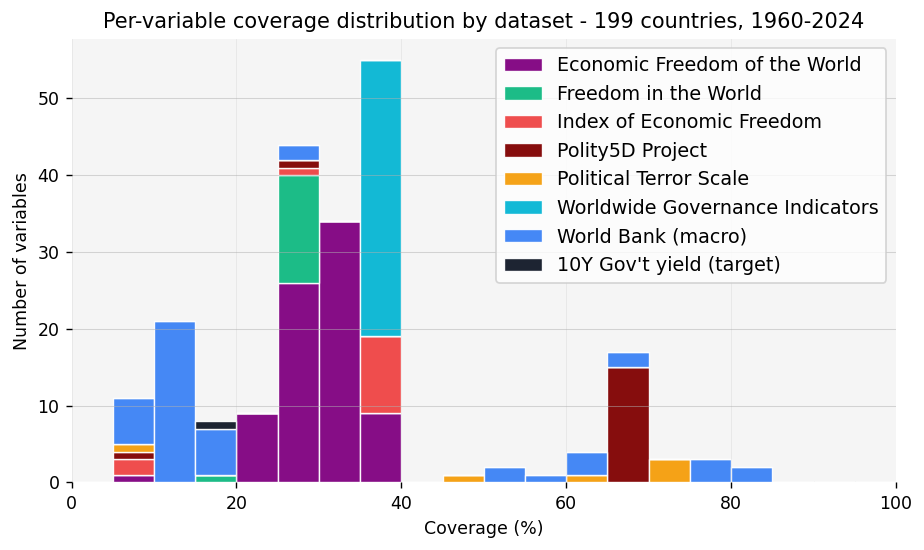

In [ ]:
from functions.plot import coverage_per_variable

coverage_per_variable(df)

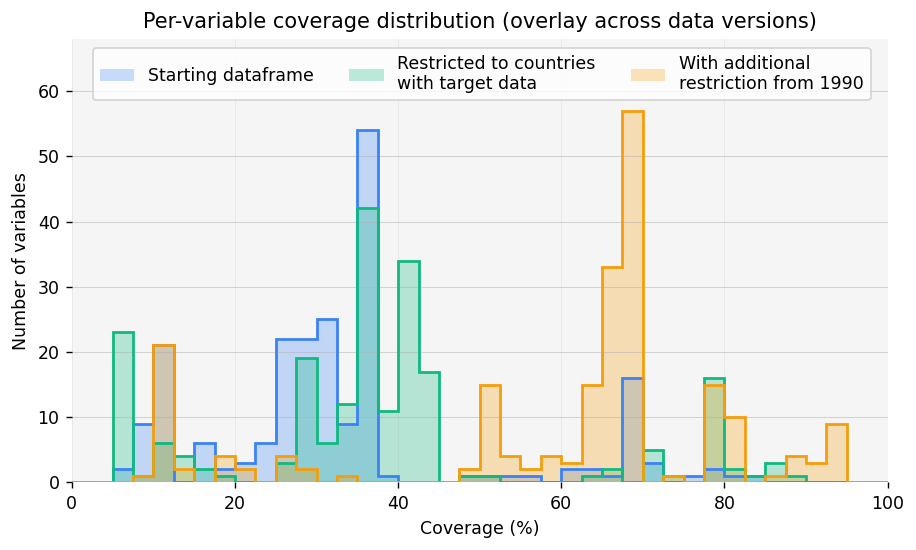

In [ ]:
from functions.plot import coverage_per_version

coverage_per_version(df)

### Timeseries

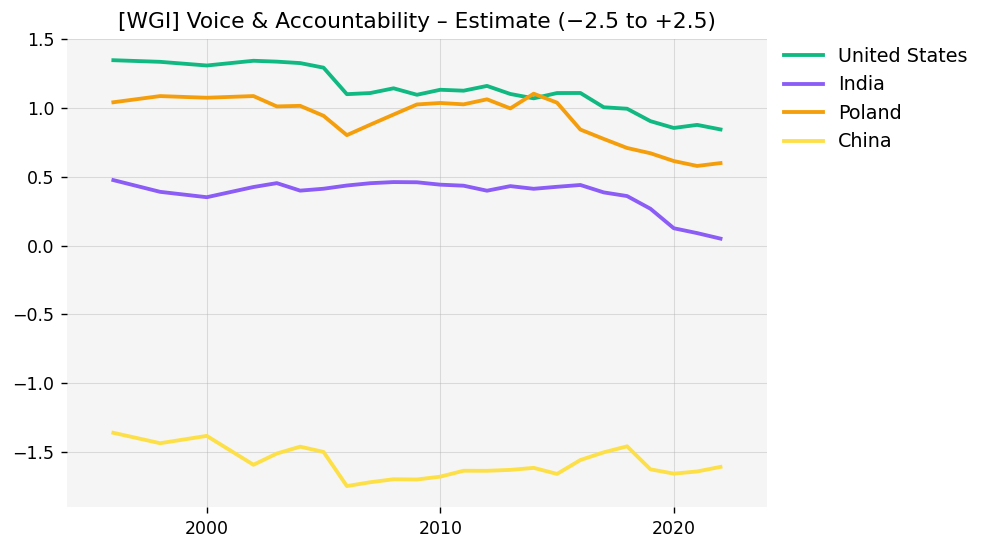

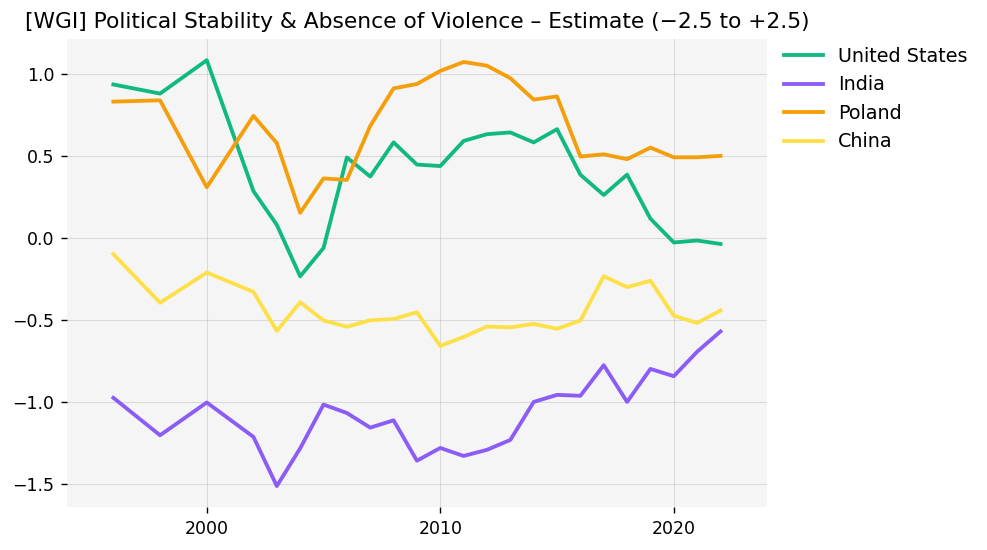

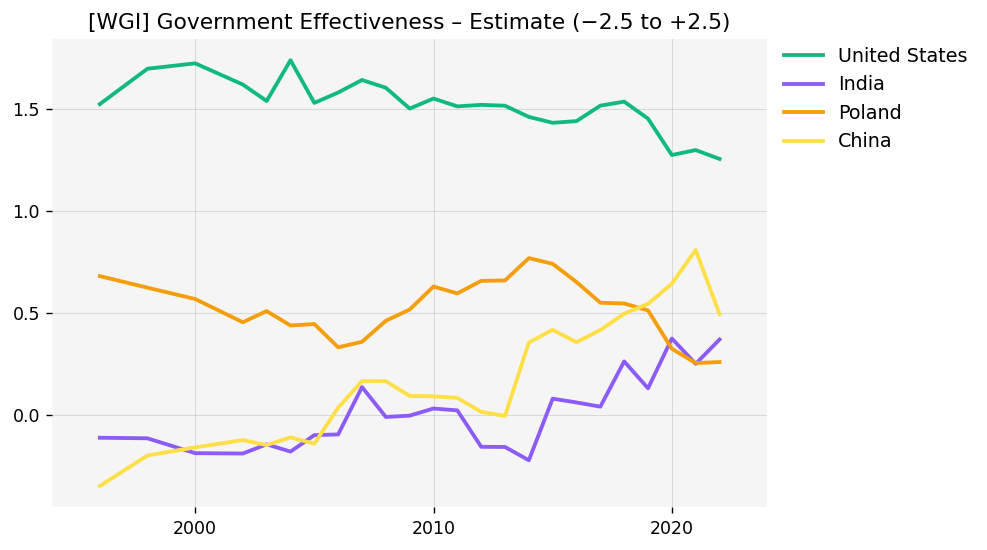

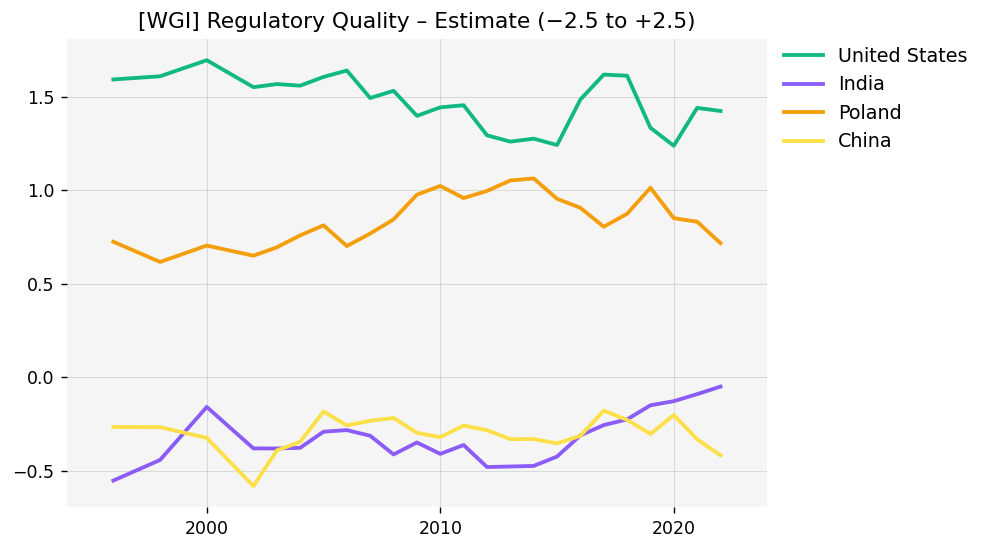

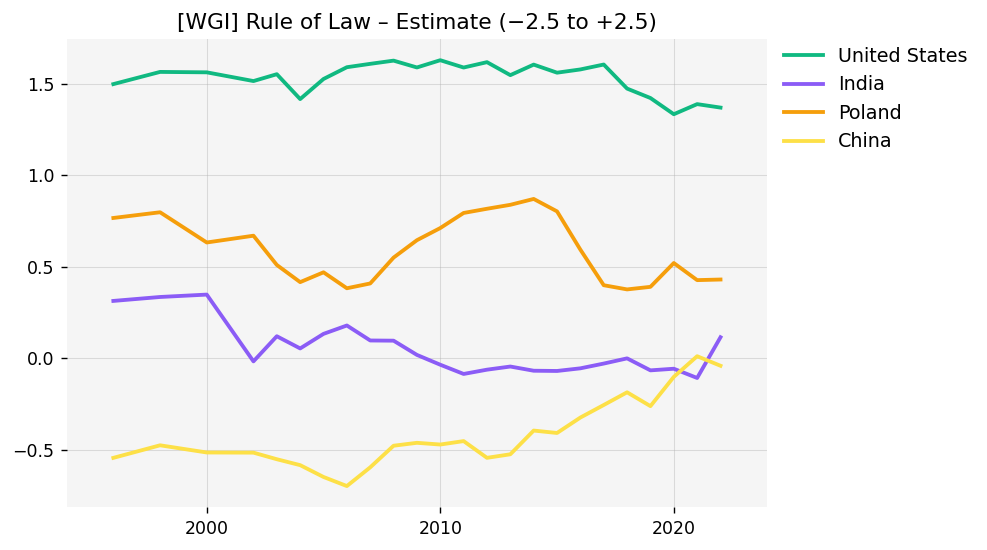

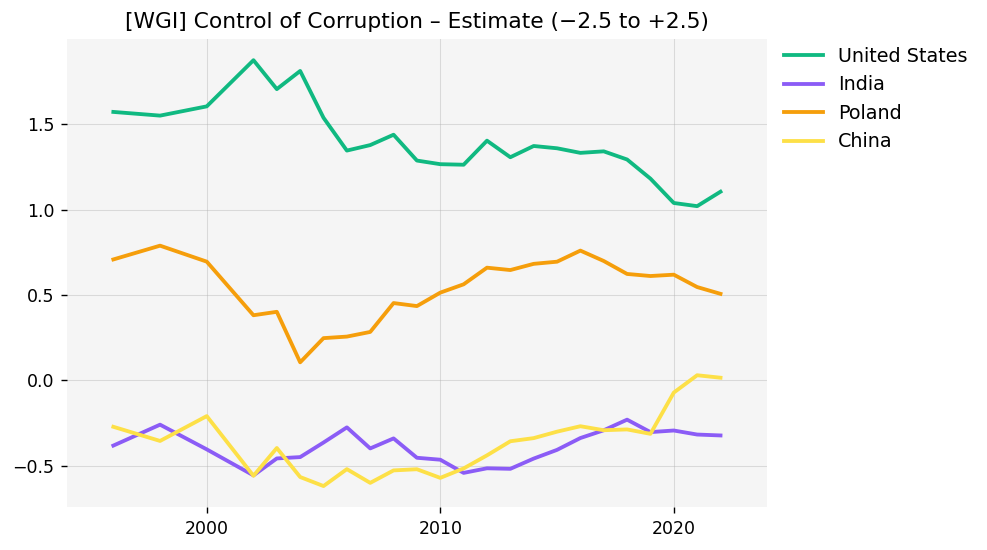

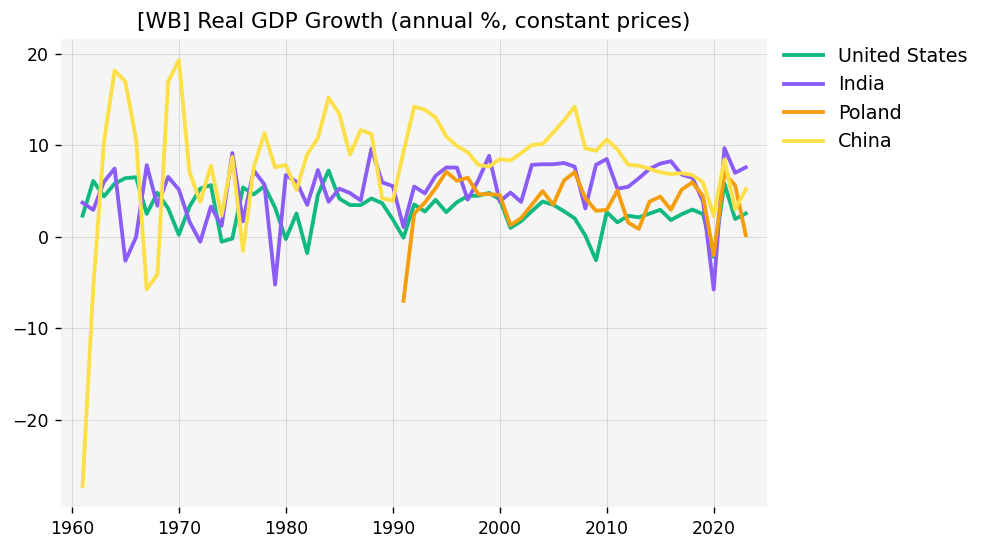

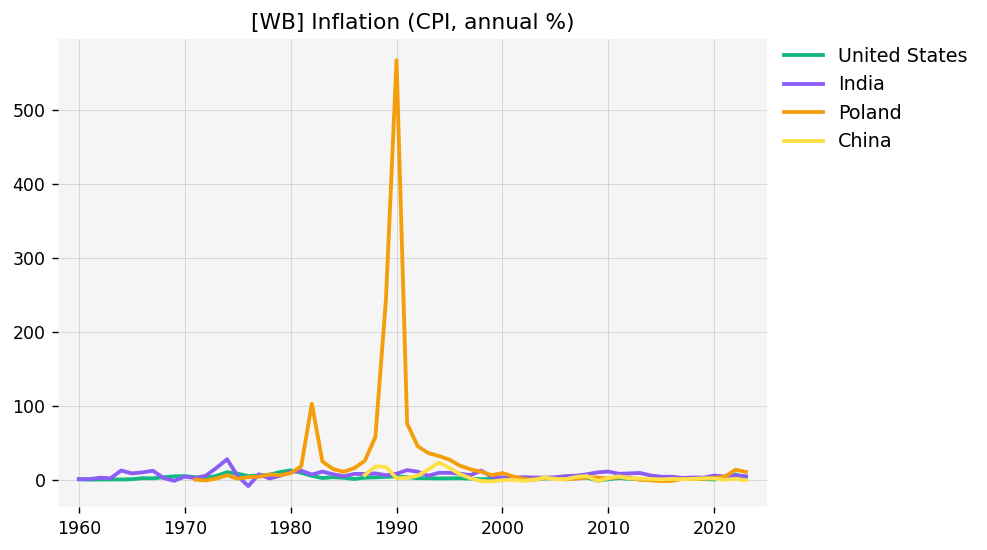

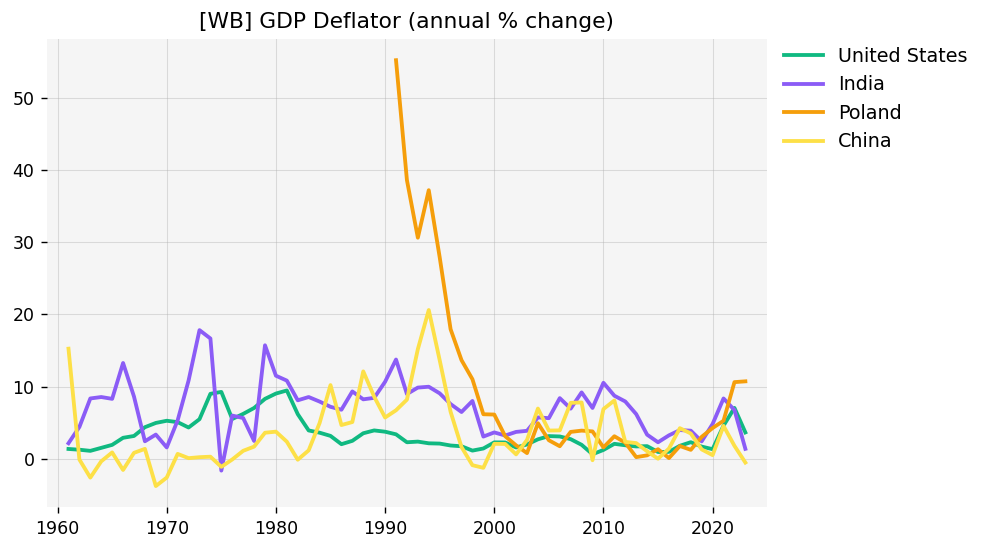

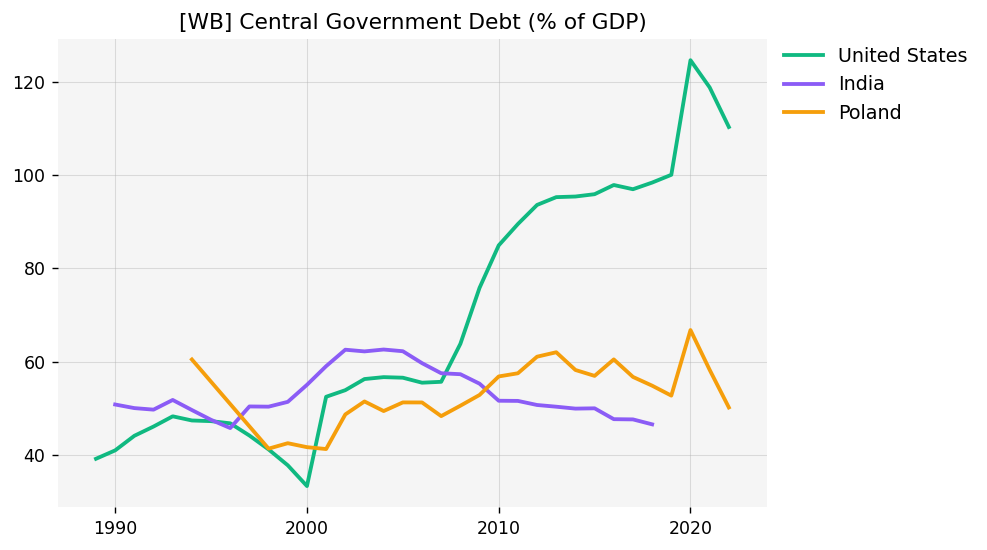

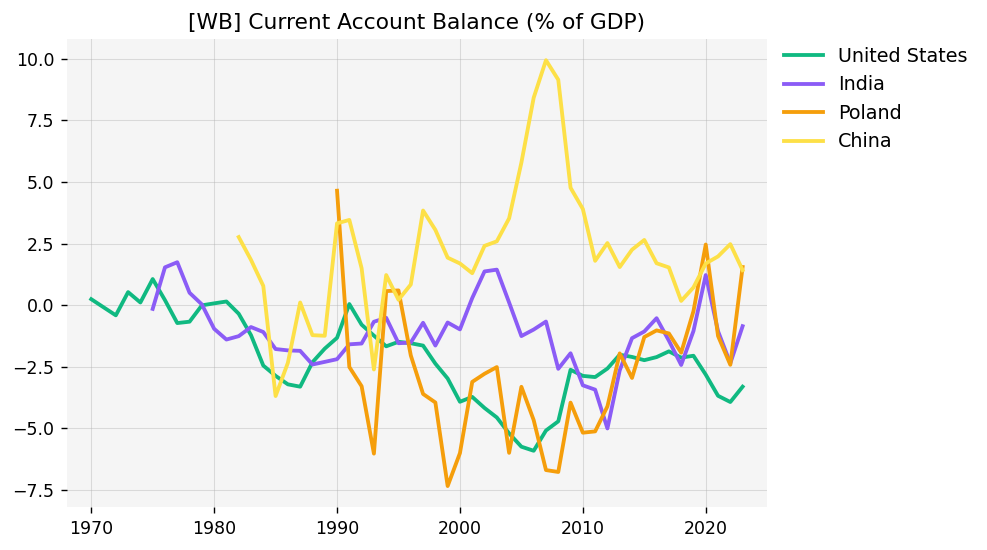

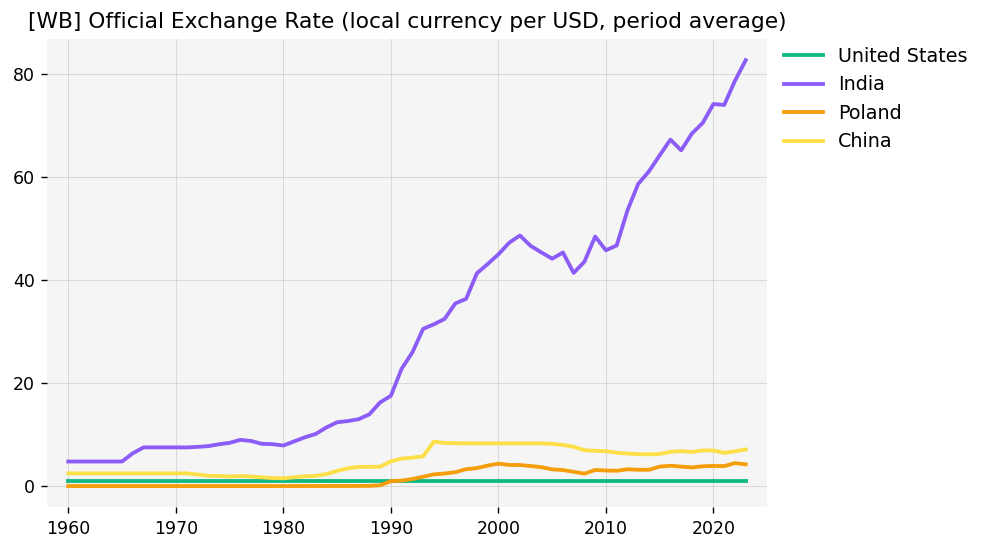

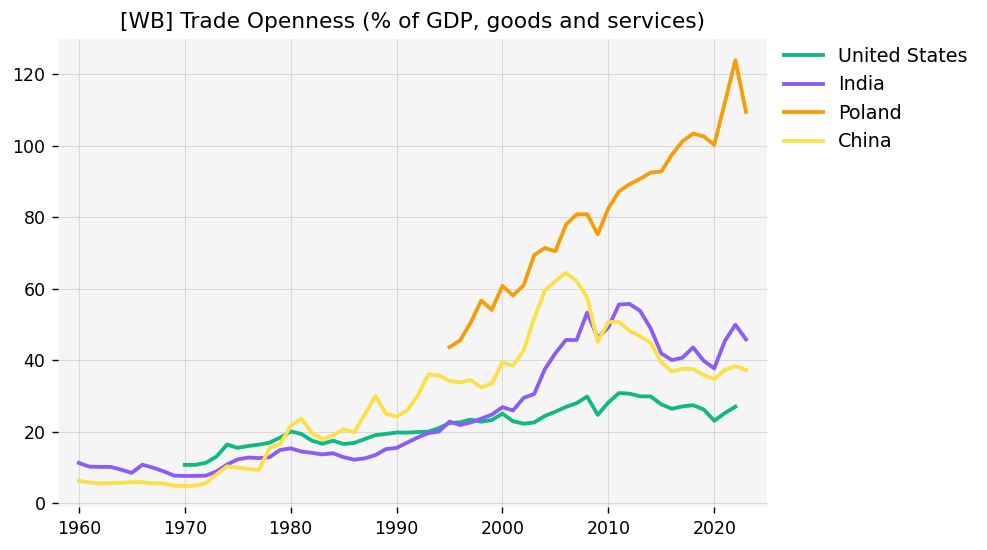

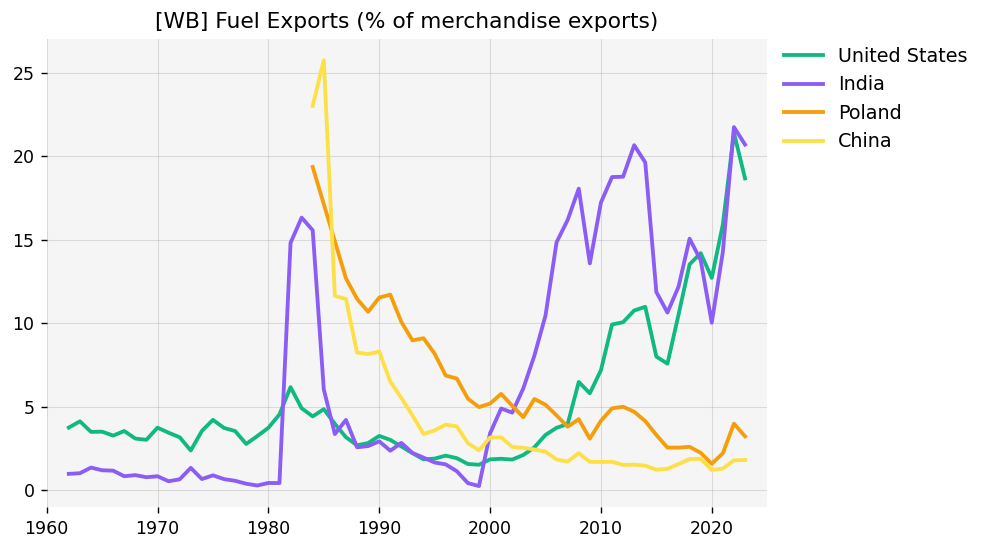

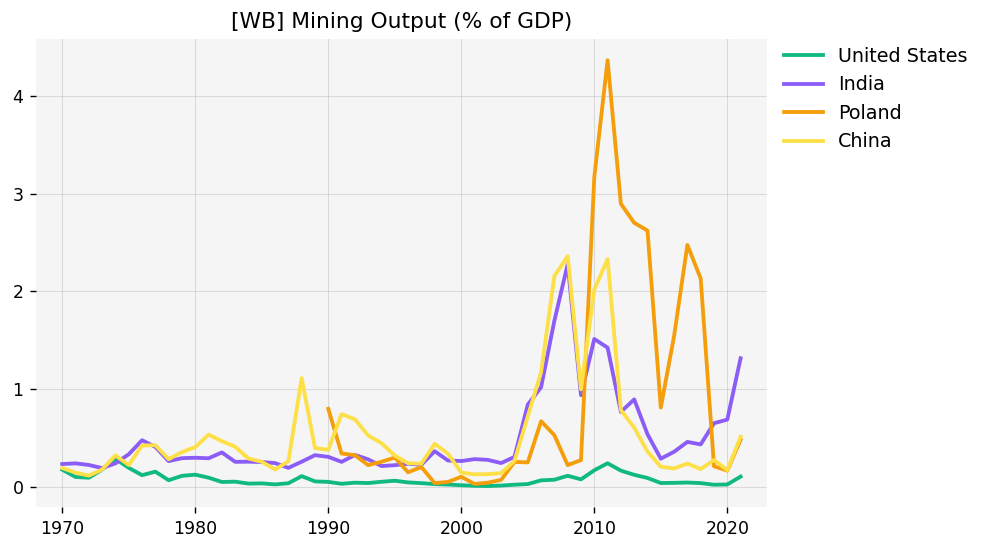

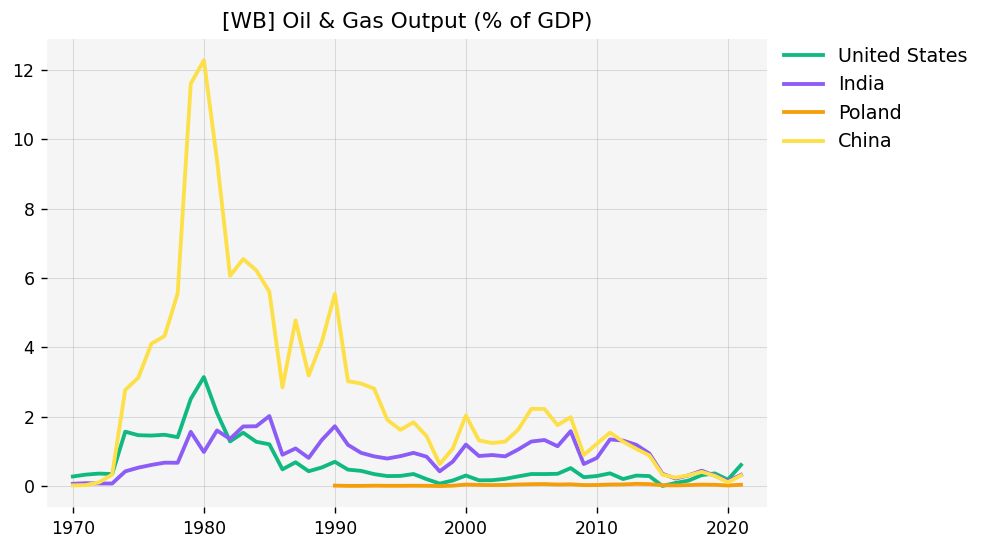

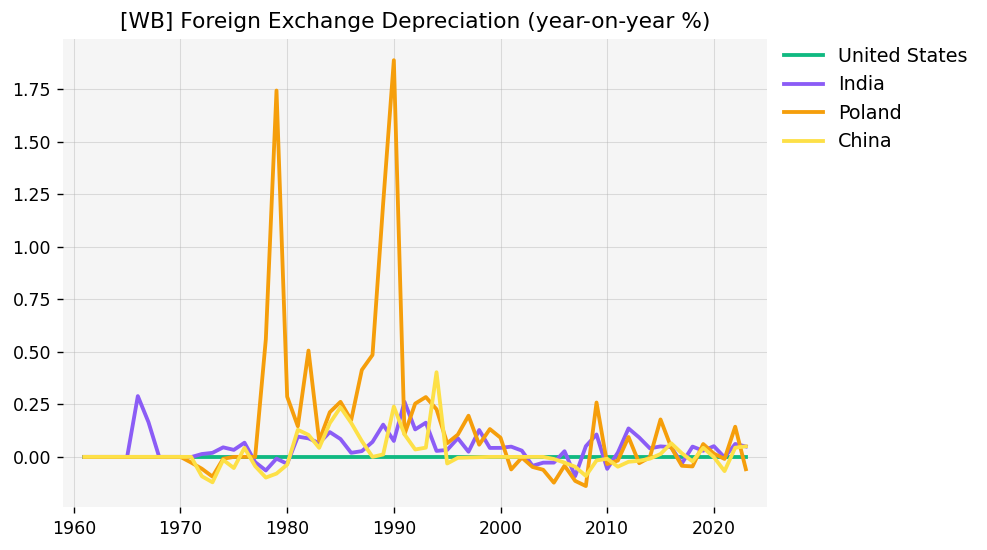

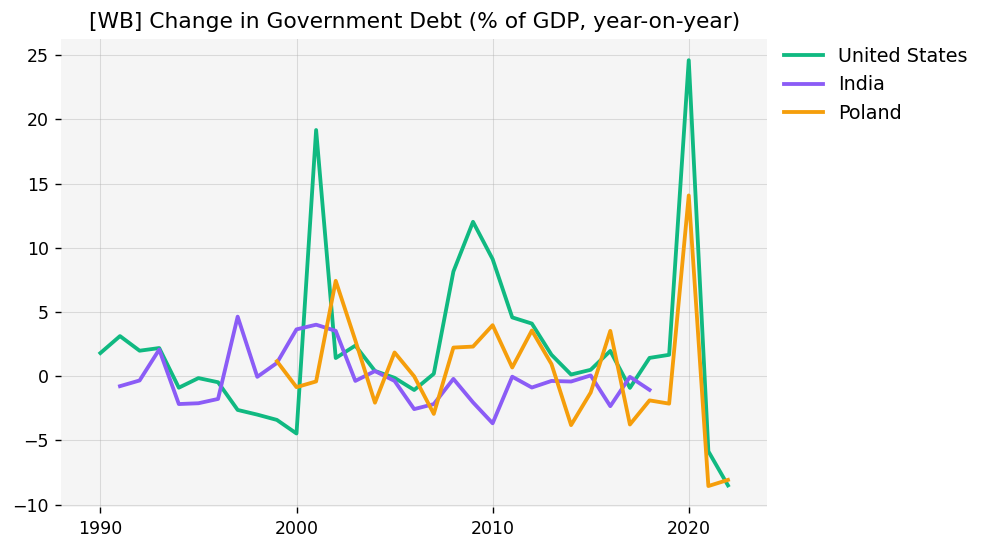

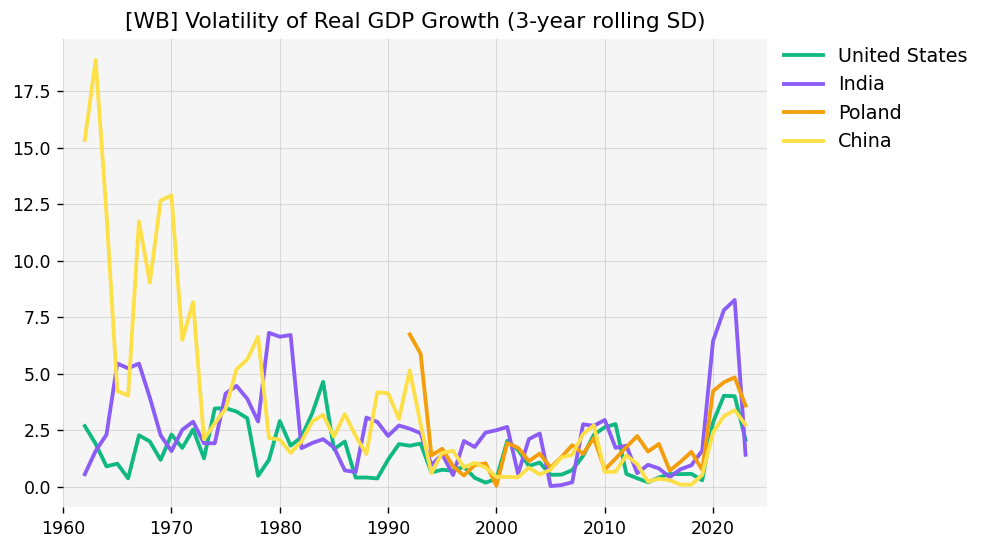

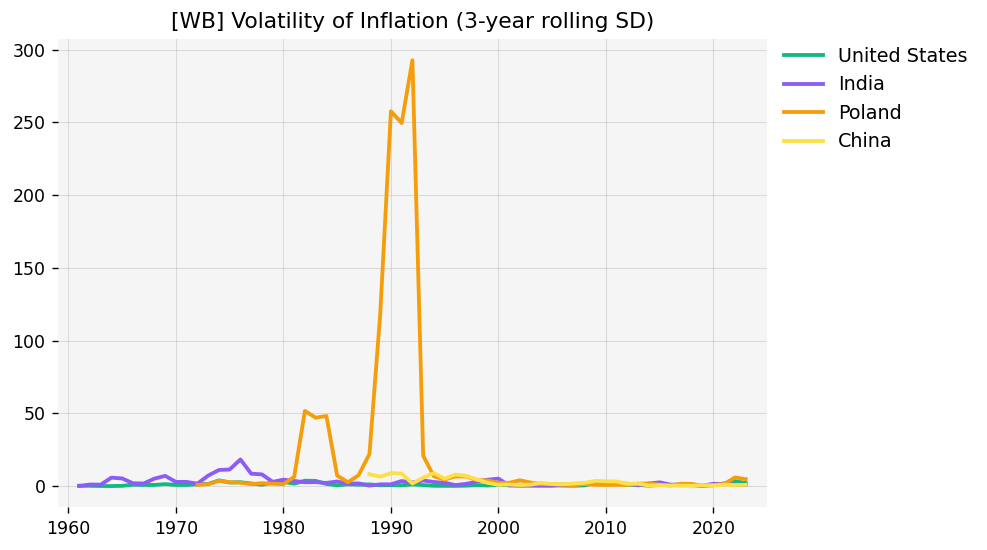

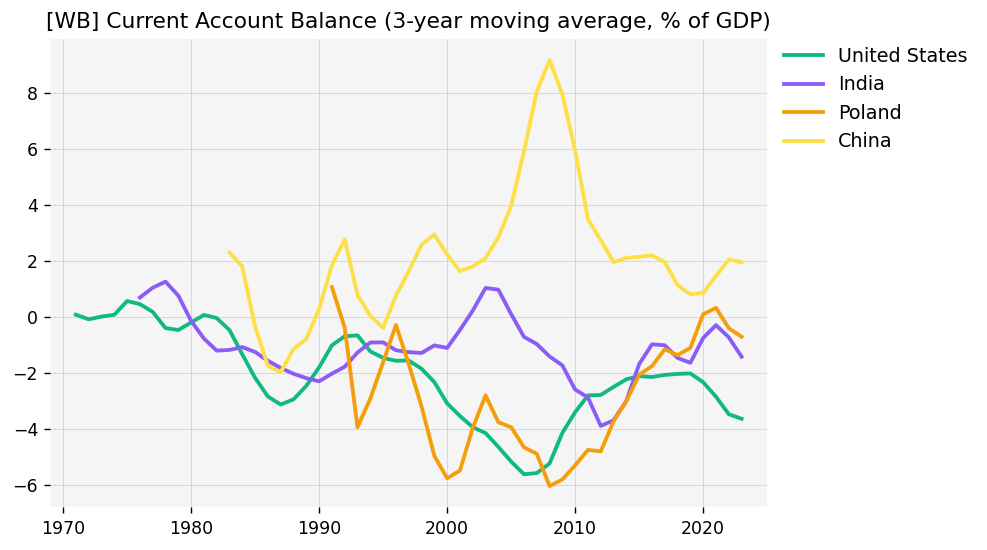

In [ ]:
from functions.labels import *
from functions.plot import vars_timeseries

countries = ["United States", "India", "Poland", "China"]
colors = ["#10b981", "#8b5cf6", "#f59e0b", "#fde047"]

labels = [
    # fiw_labels,
    # efw_labels,
    # ief_labels,
    # p5d_labels,
    # pts_labels,
    wgi_labels,
    # wb_iq_labels,
    controls_labels
]

for label in labels:
    vars_timeseries(df, label, countries, colors)

## Target

/content/drive/MyDrive/Colab Notebooks/instquality/functions/load.py:106: SyntaxWarning: invalid escape sequence '\d'
  df_long['Year'] = df_long['Year_Metric'].str.extract('(\d+)')[0]  # Extract year part


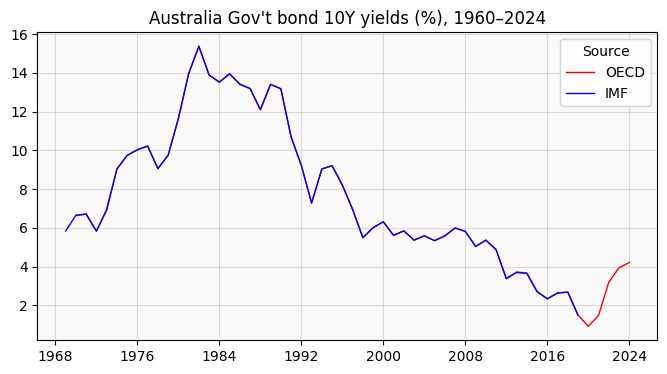

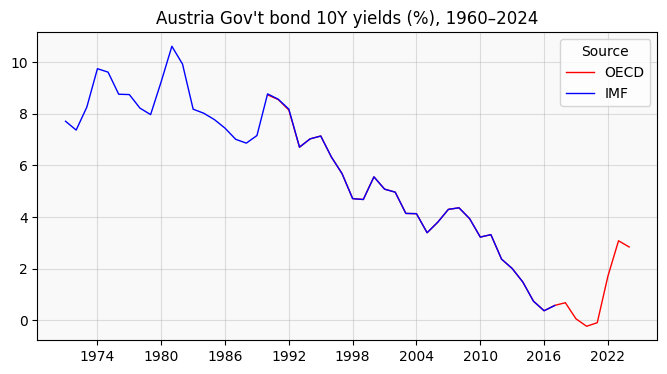

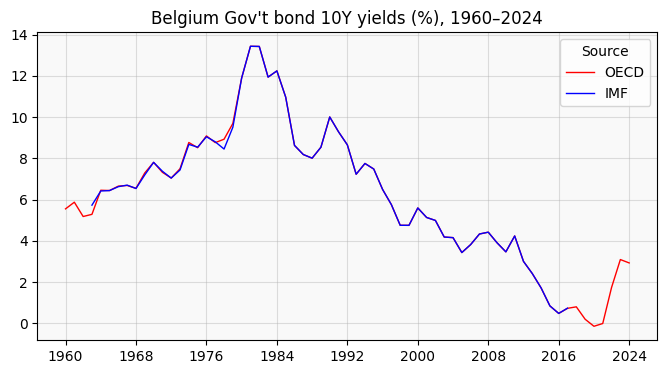

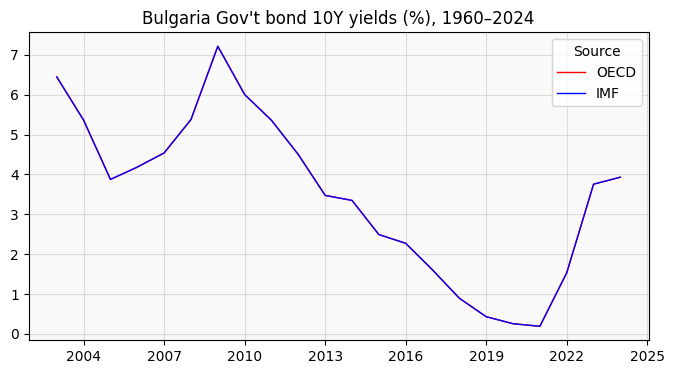

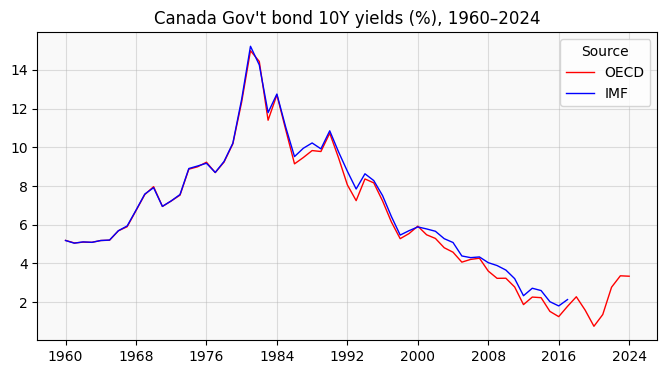

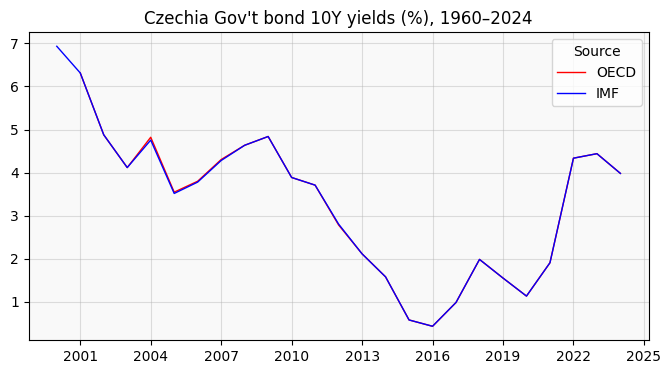

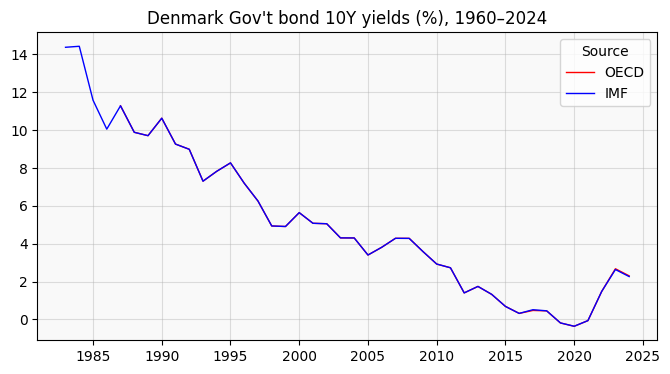

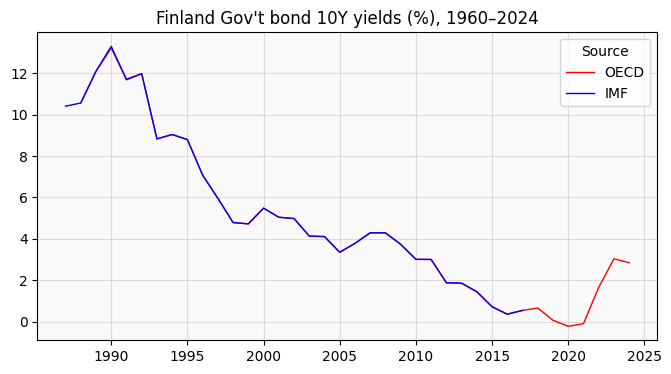

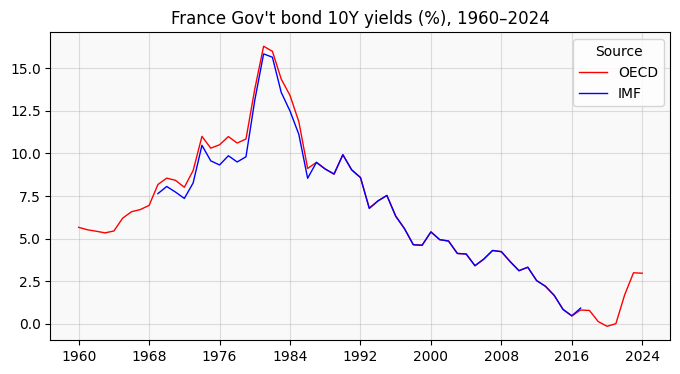

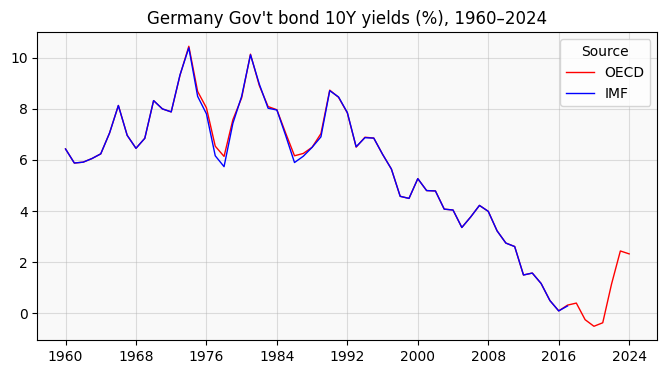

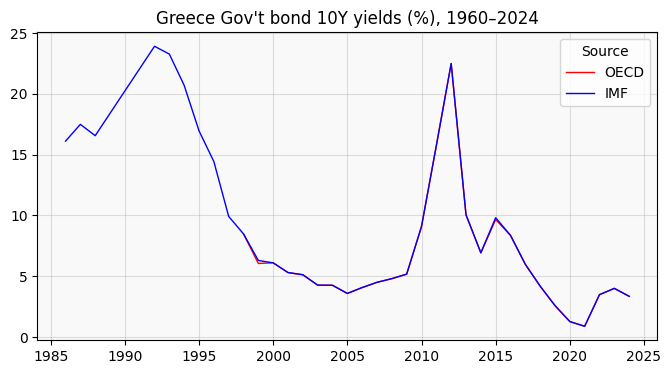

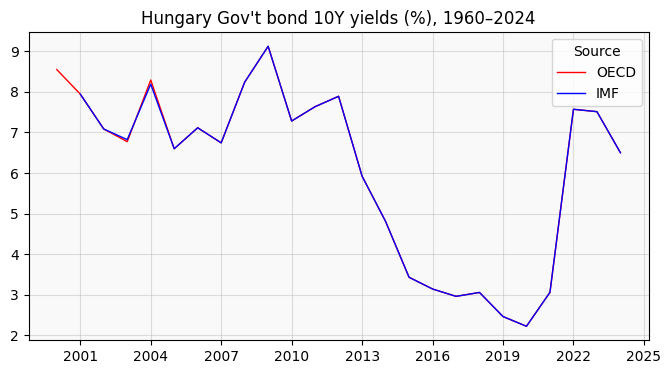

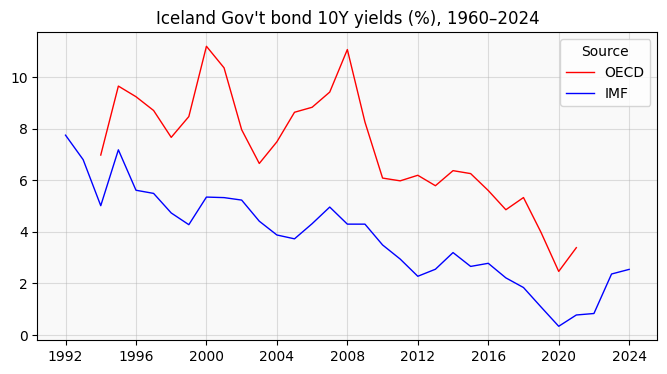

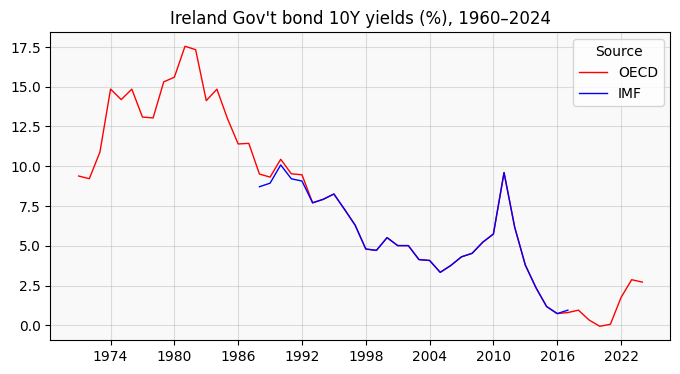

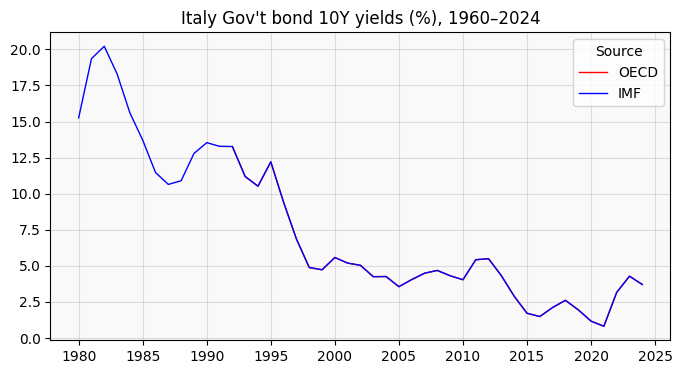

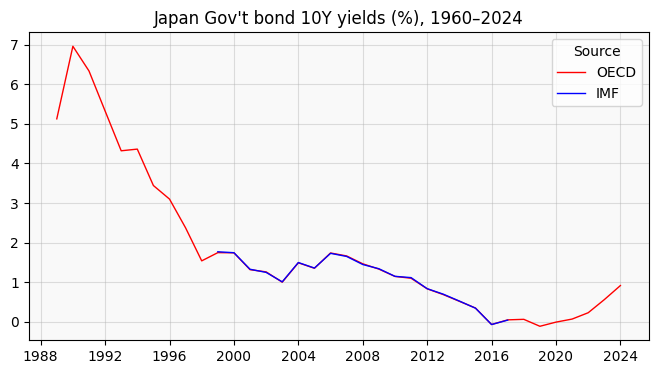

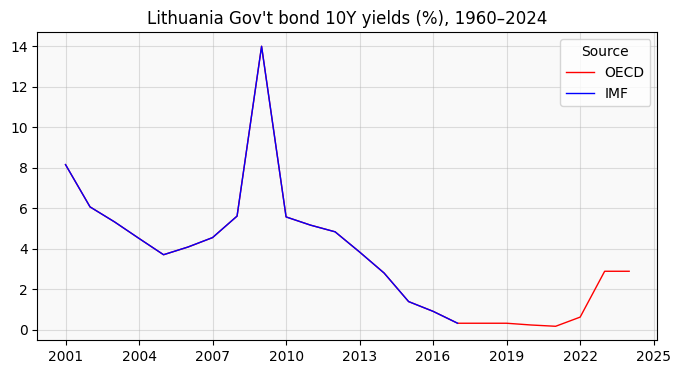

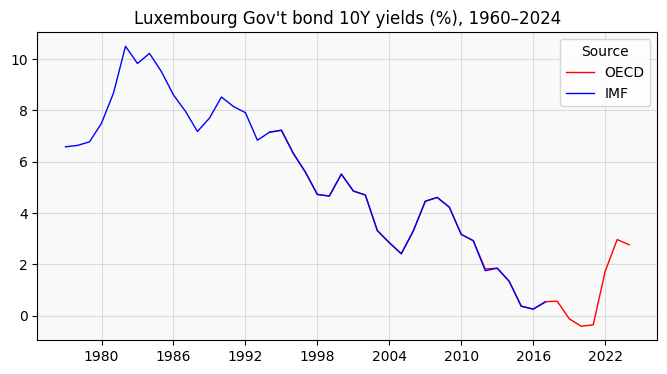

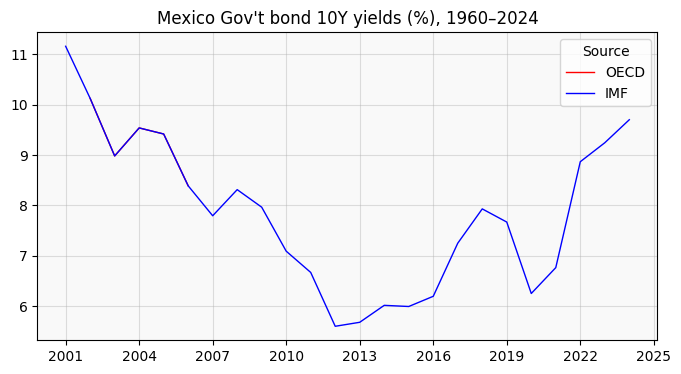

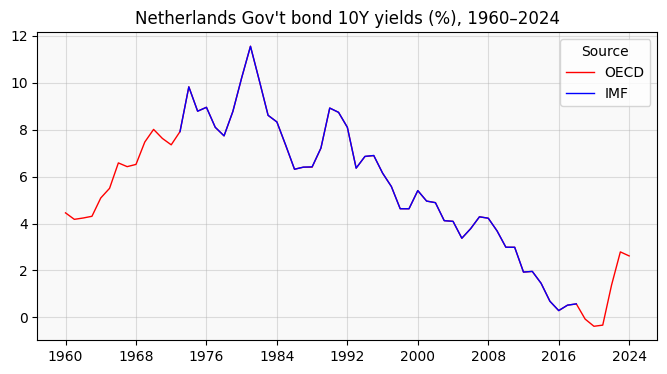

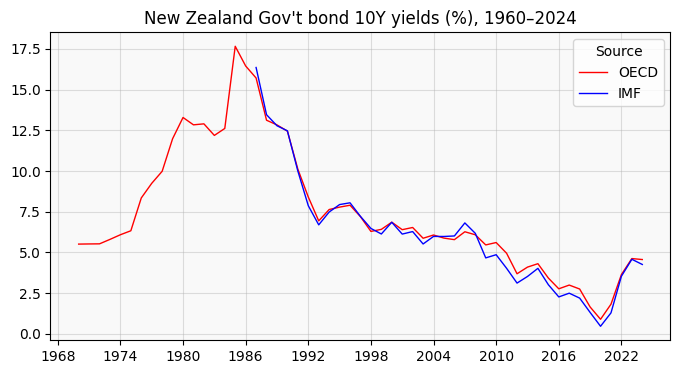

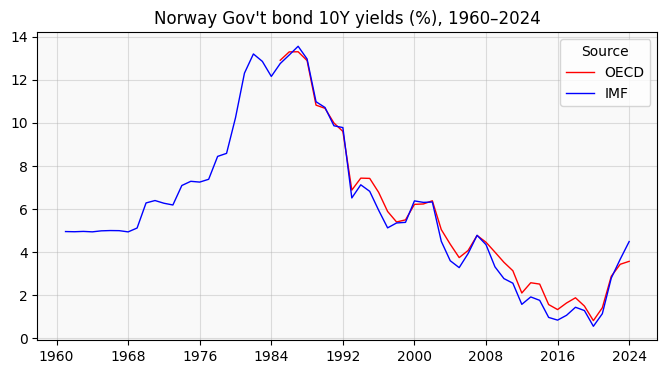

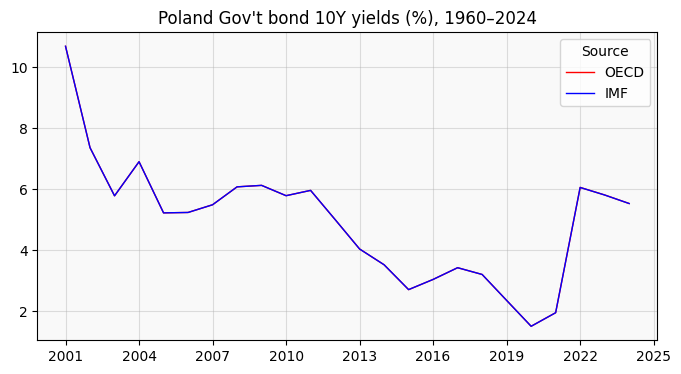

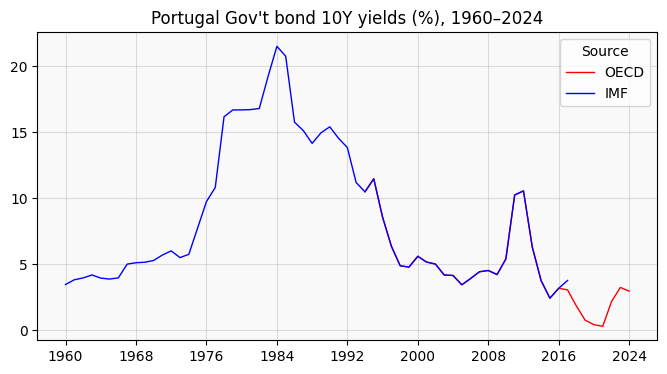

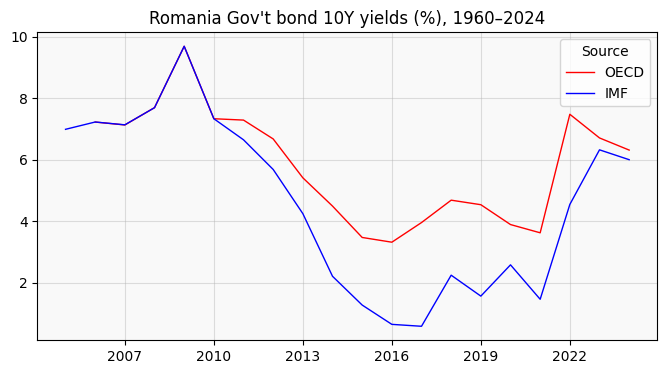

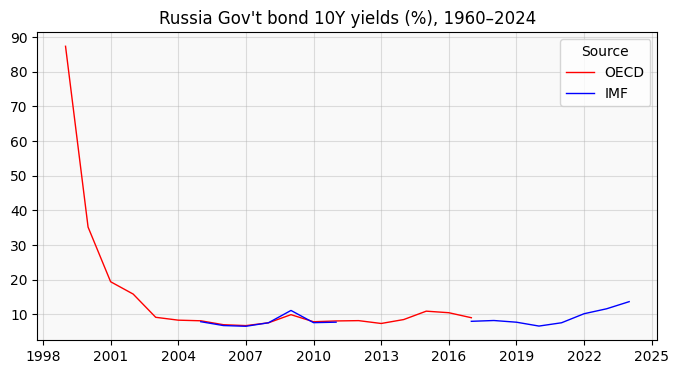

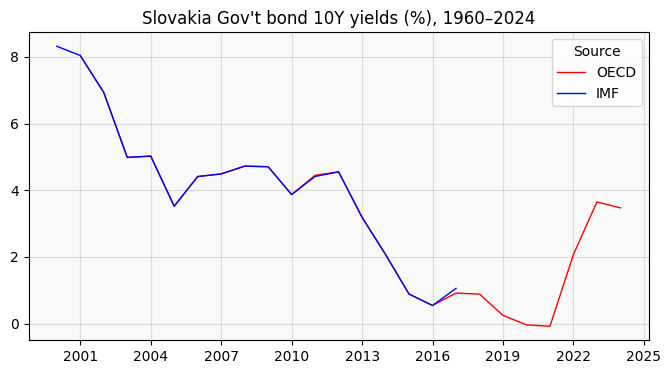

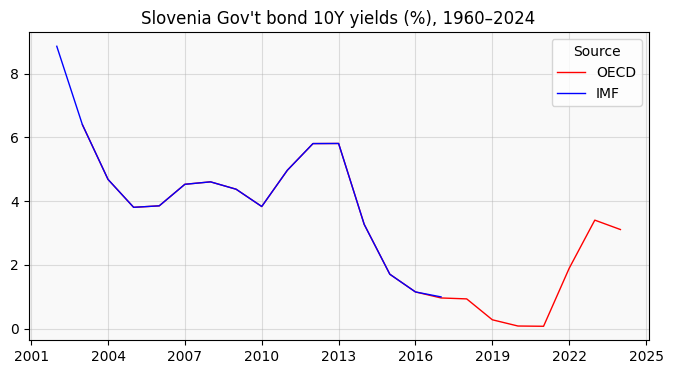

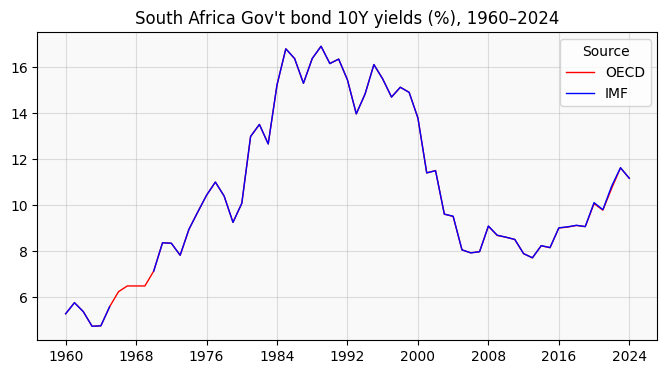

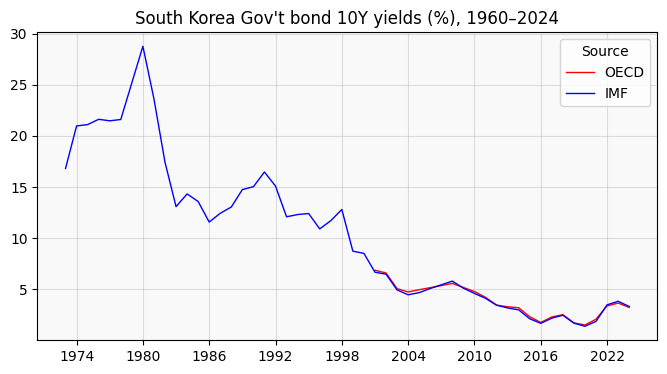

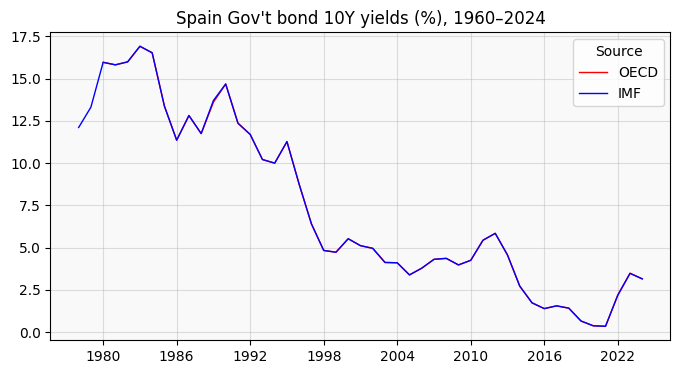

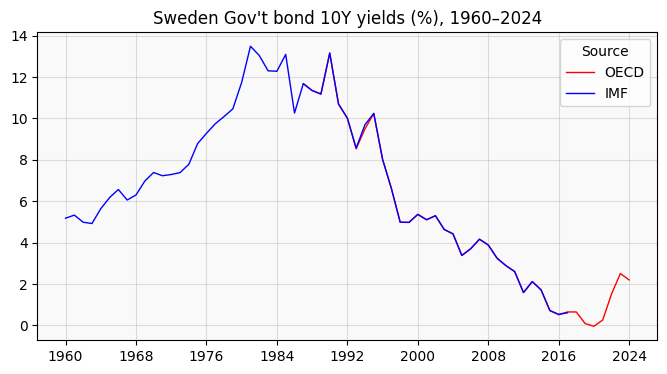

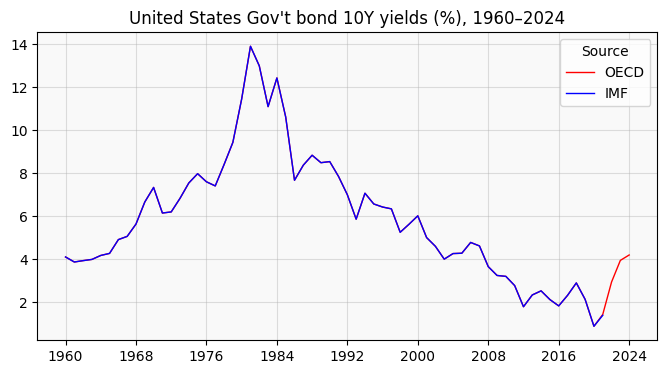

In [ ]:
# alignment of sources

# pip install sdmx1
import sdmx
import country_converter as coco

from functions.load import load_target
from functions.plot import compare_target_sources

tgt = load_target("files/OECD.csv", merge_sources=False)
compare_target_sources(tgt, 'both')

# target yield is composed of OECD (preferred) and IMF data

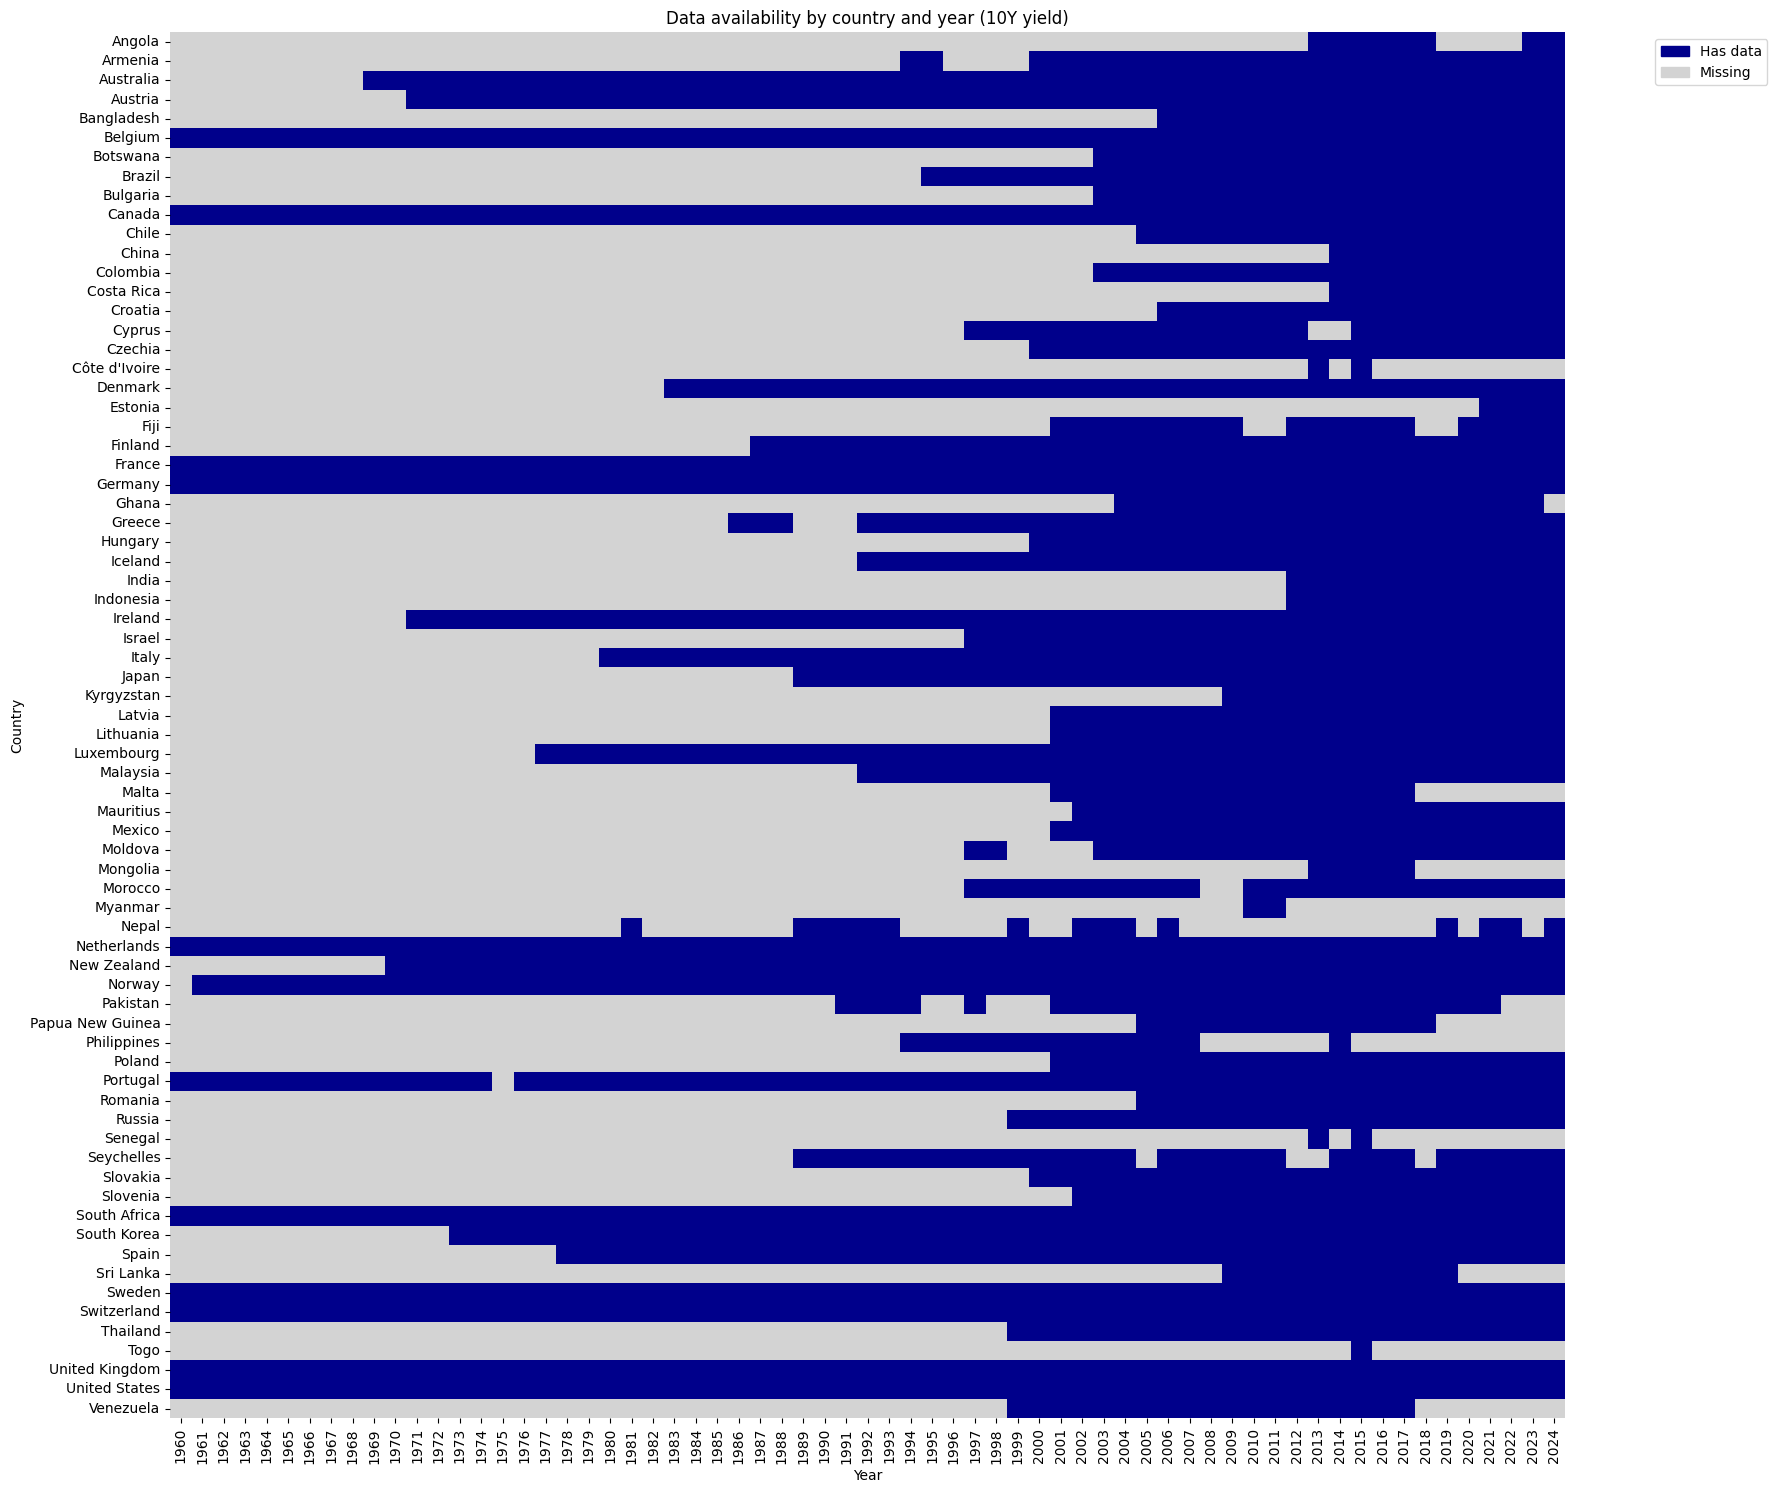

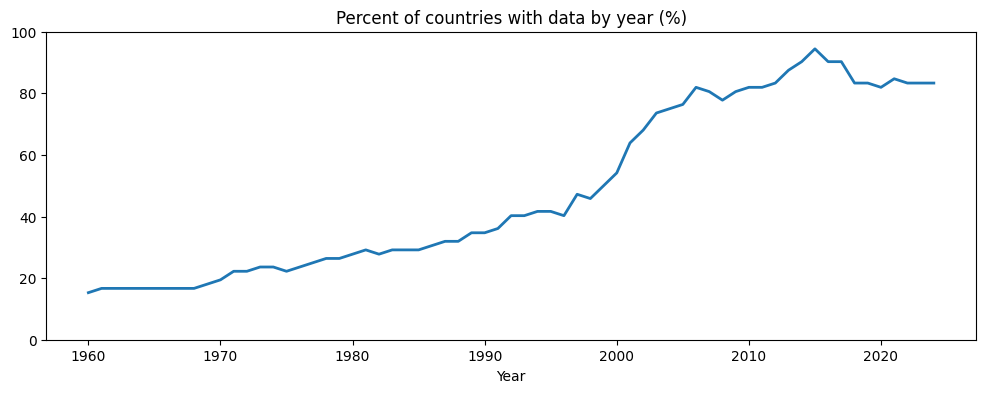

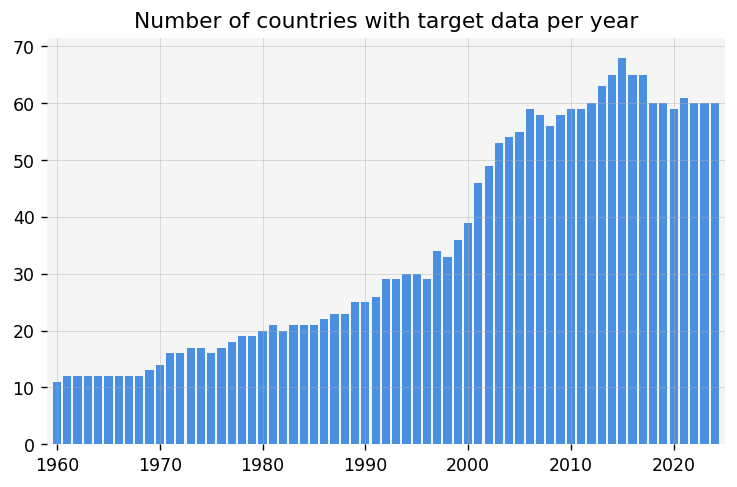

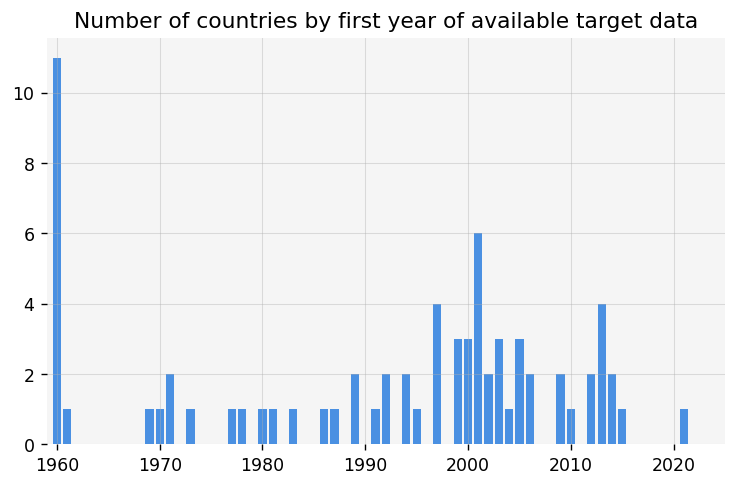

In [ ]:
# target coverage

from functions.plot import target_coverage, target_coverage_start

target_coverage(df, excl_missing=True) # excl missing countries

target_coverage_start(df, cumulative=True)
target_coverage_start(df, cumulative=False)

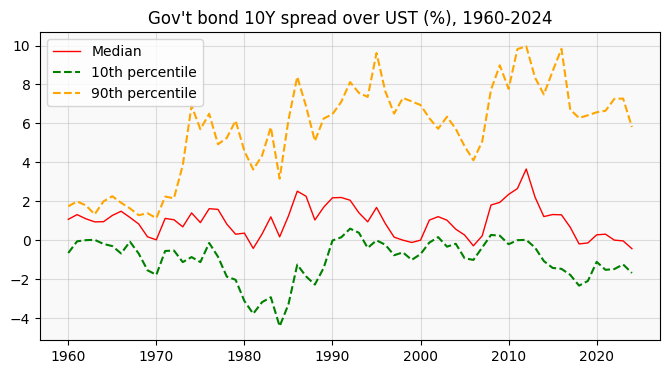

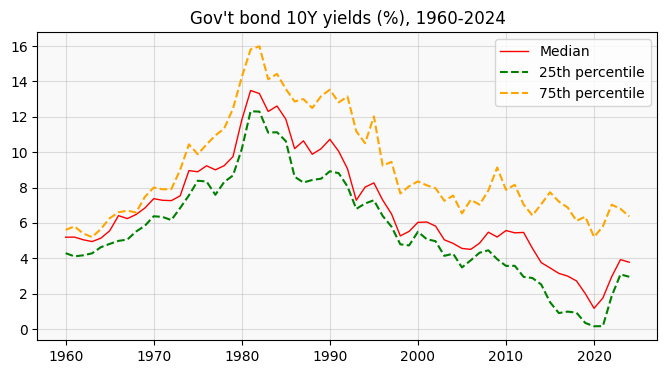

In [ ]:
# percentiles timeseries

from functions.utils import prep_target

df = prep_target(df)

from functions.plot import target_timeseries

target_timeseries(df, 'spread', 0.1, 0.9)
target_timeseries(df, 'yield', 0.25, 0.75)

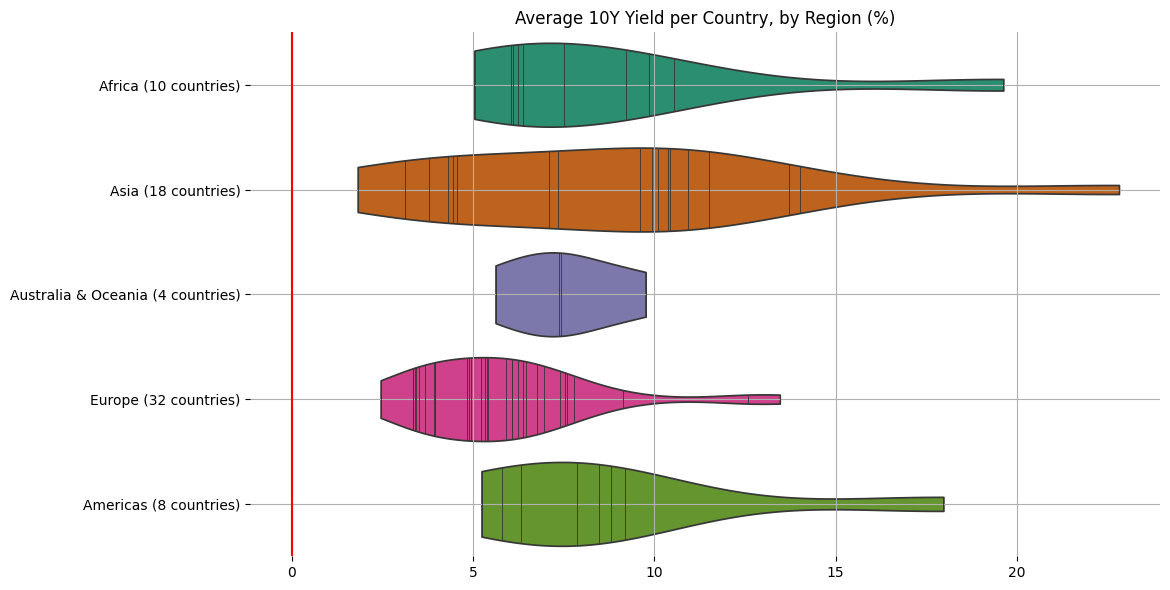

In [ ]:
# values per region

from functions.plot import region_violin

region_violin(df)

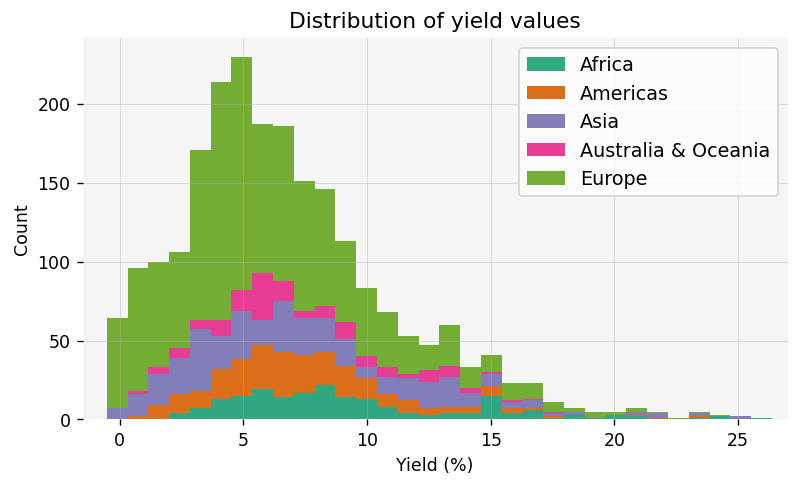

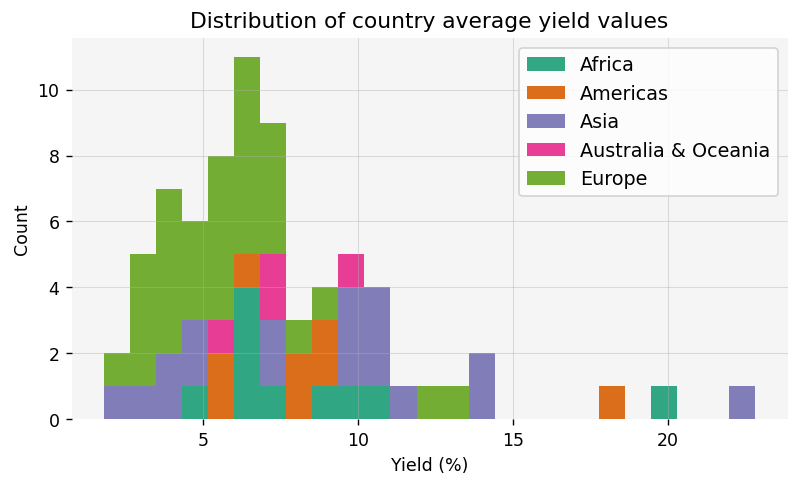

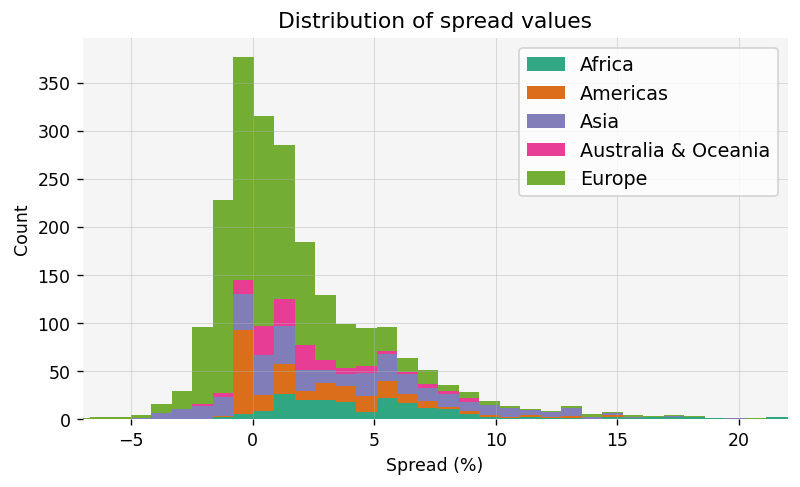

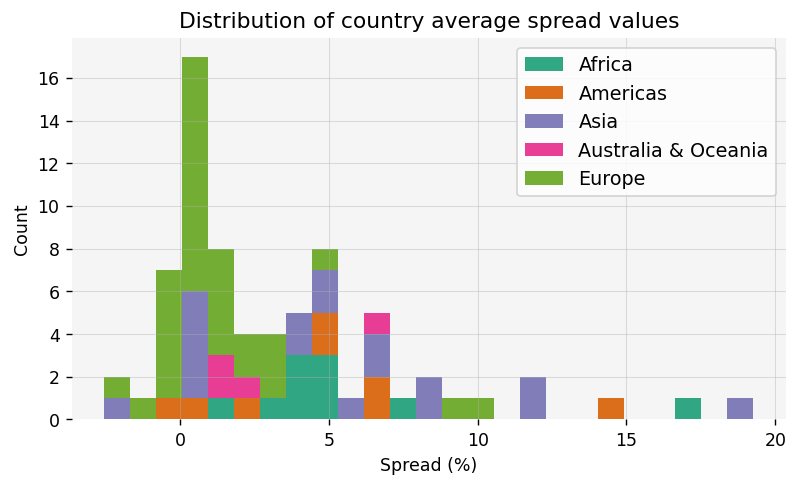

In [ ]:
# histogram of yield / spread values

from functions.plot import target_histogram

target_histogram(df, variable="tgt_yield", country_average=False)
target_histogram(df, variable="tgt_yield", country_average=True)
target_histogram(df, variable="tgt_spread", country_average=False)
target_histogram(df, variable="tgt_spread", country_average=True)

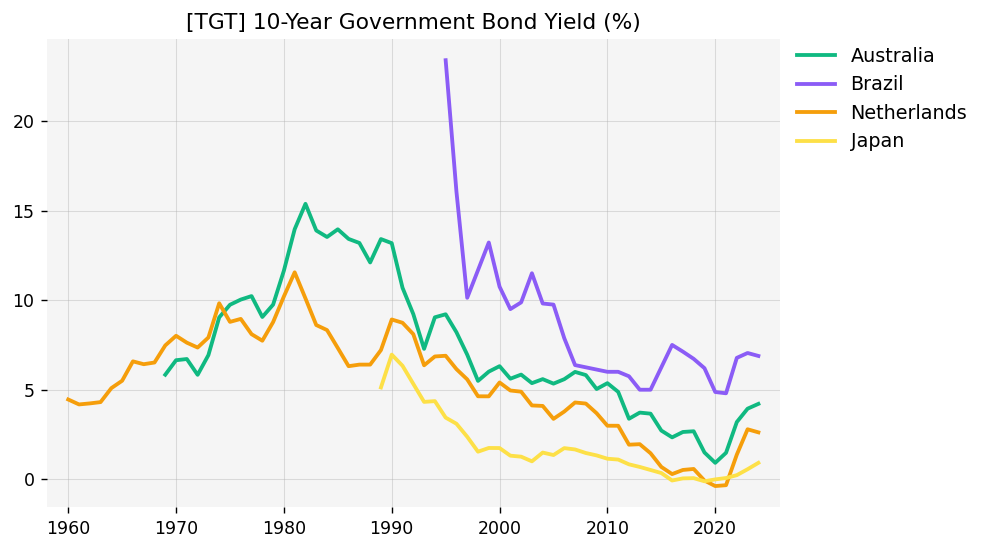

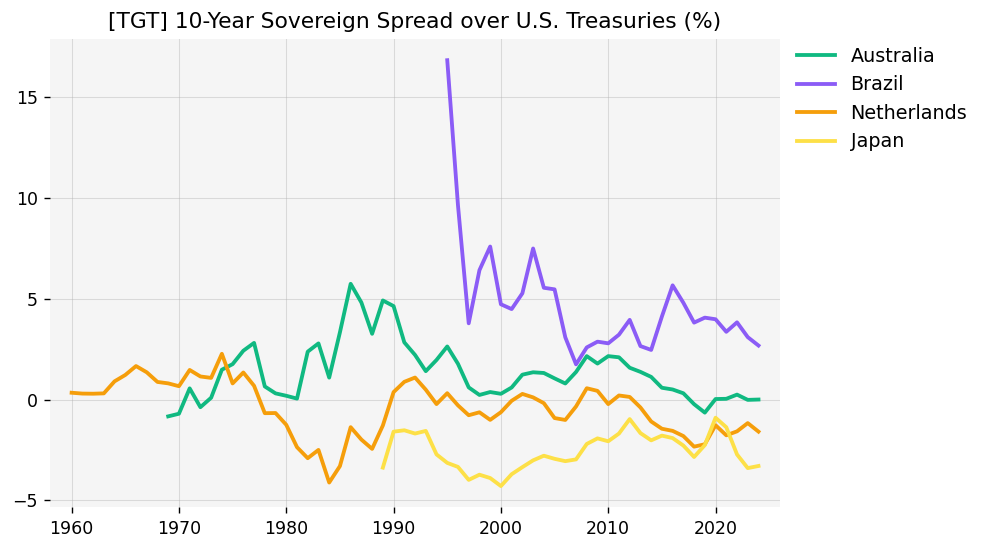

In [ ]:
# target timeseries

from functions.labels import tgt_labels
from functions.plot import vars_timeseries

countries = ["Australia", "Brazil", "Netherlands", "Japan"]
colors = ["#10b981", "#8b5cf6", "#f59e0b", "#fde047"]

vars_timeseries(df, tgt_labels, countries, colors)

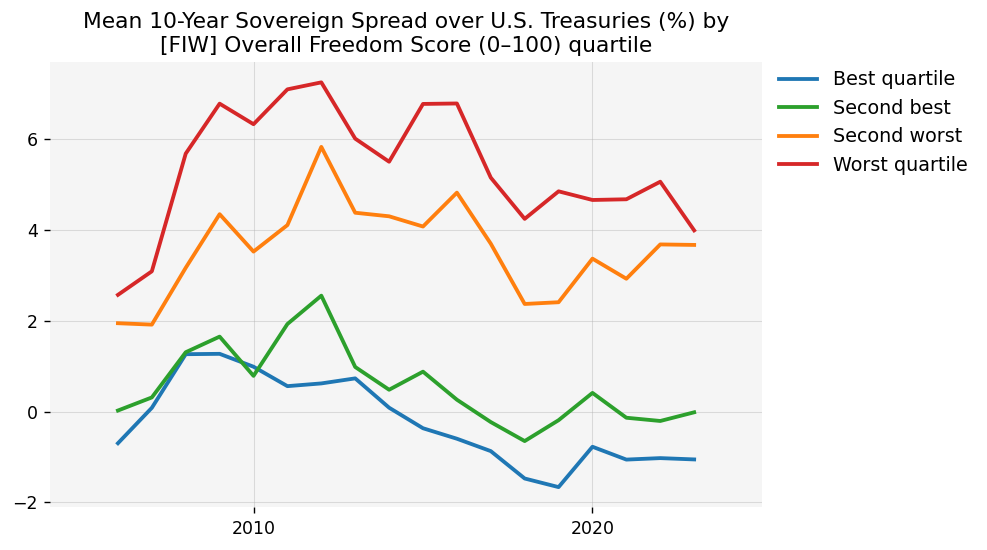

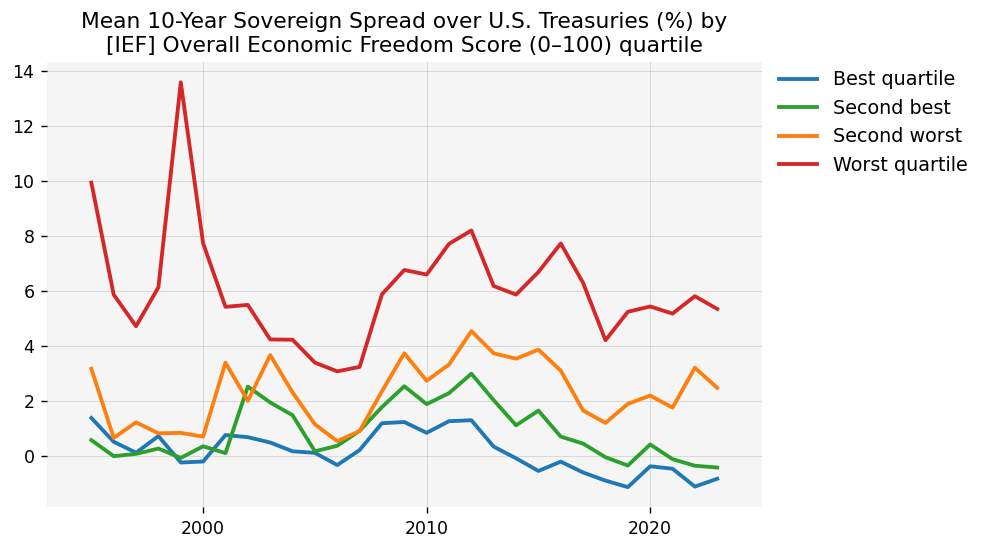

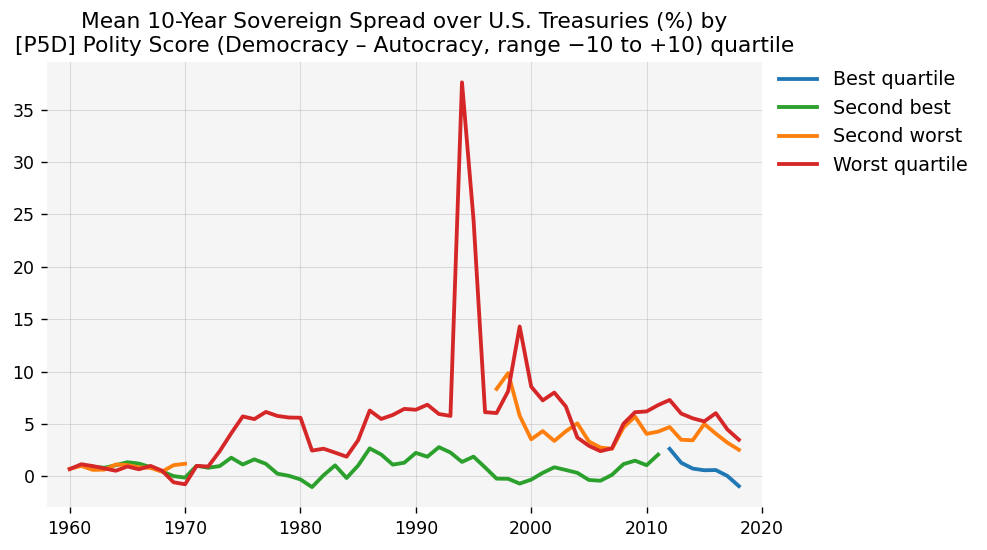

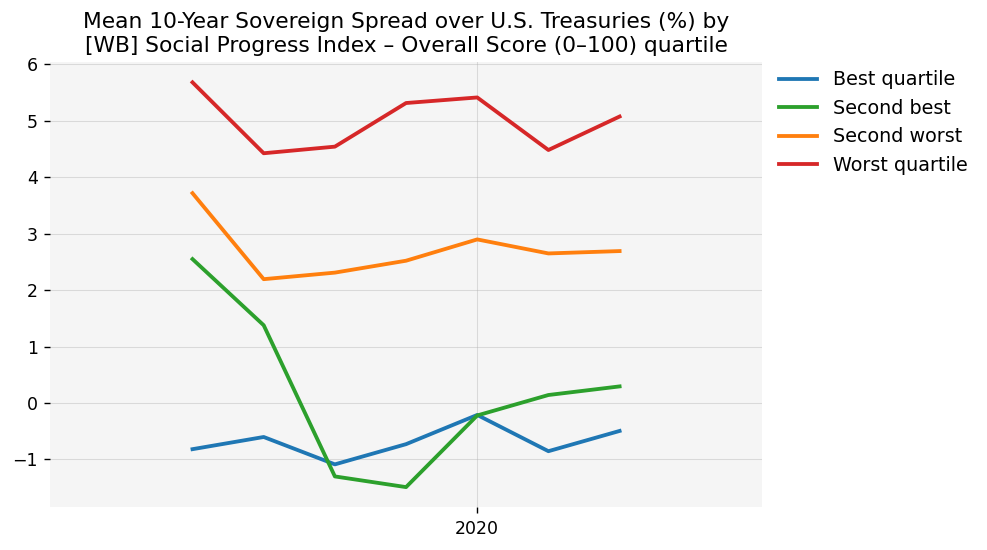

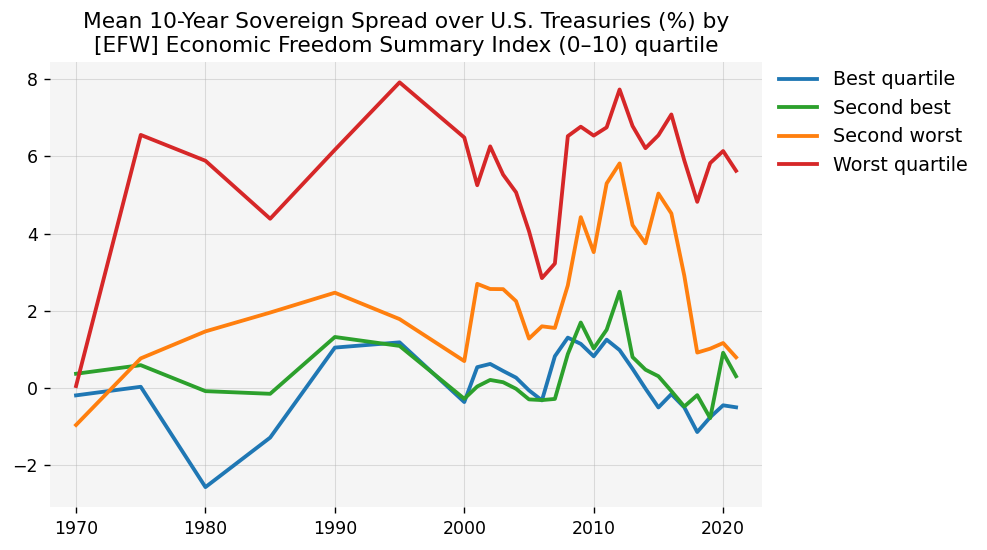

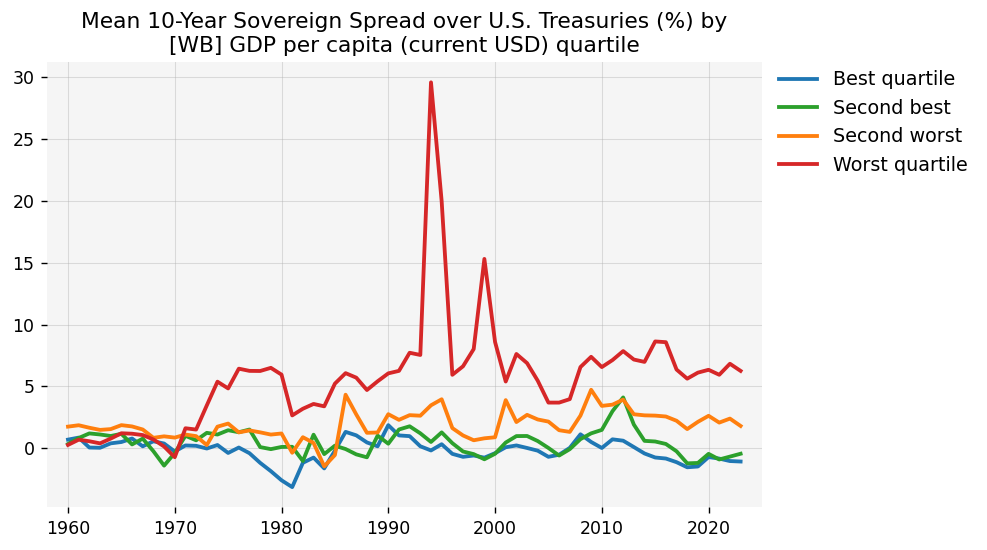

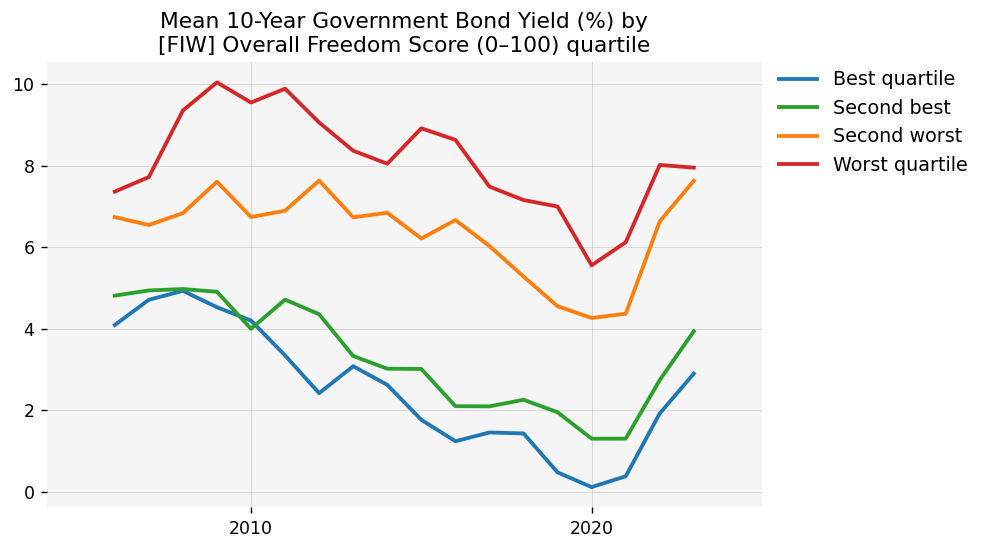

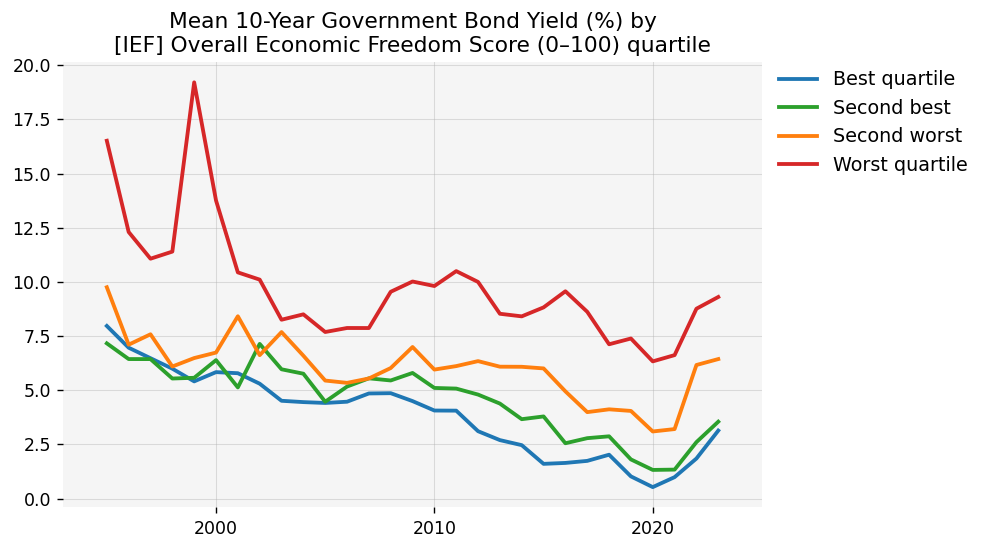

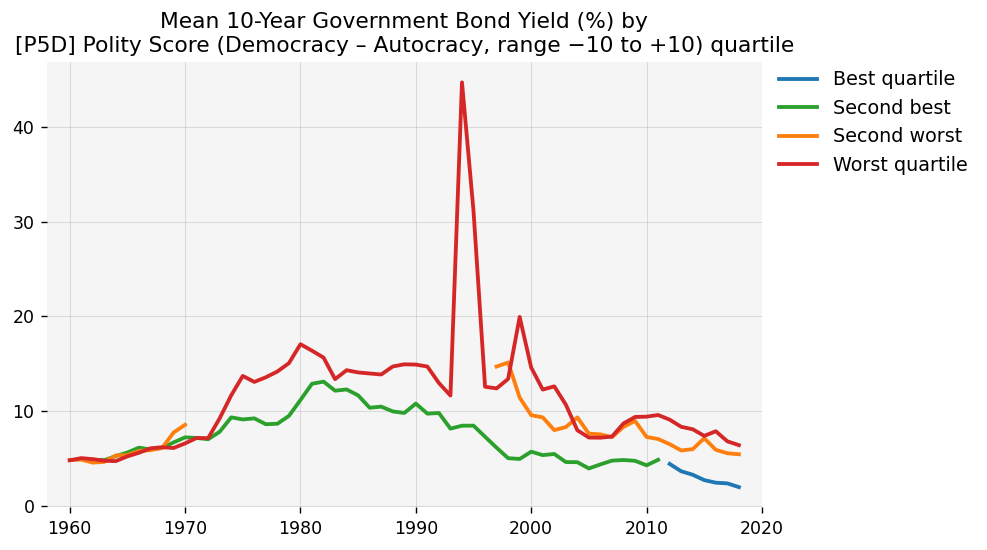

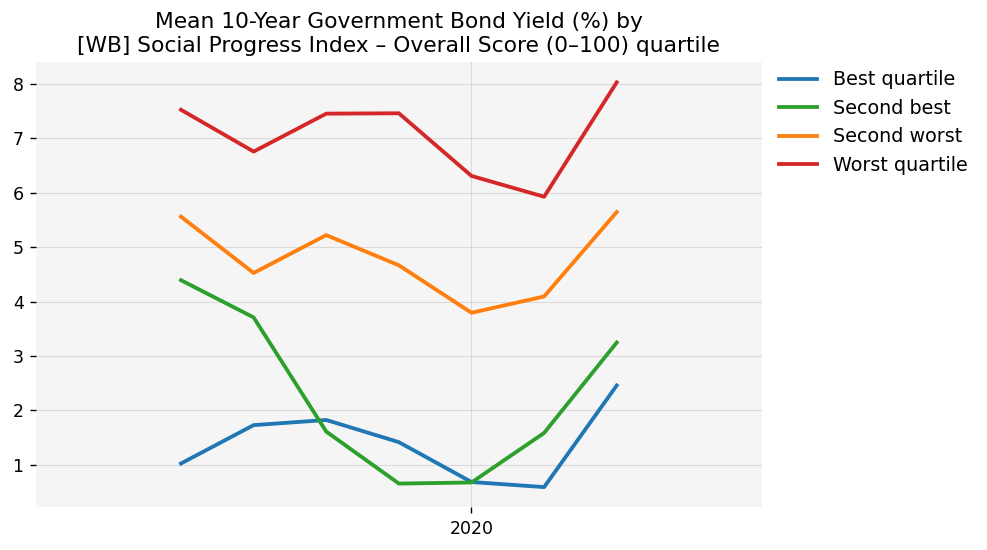

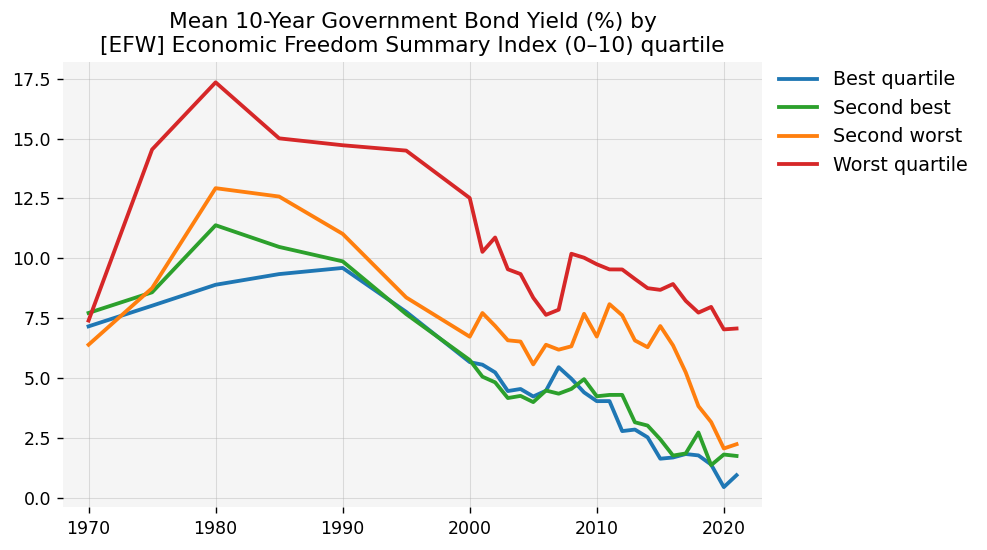

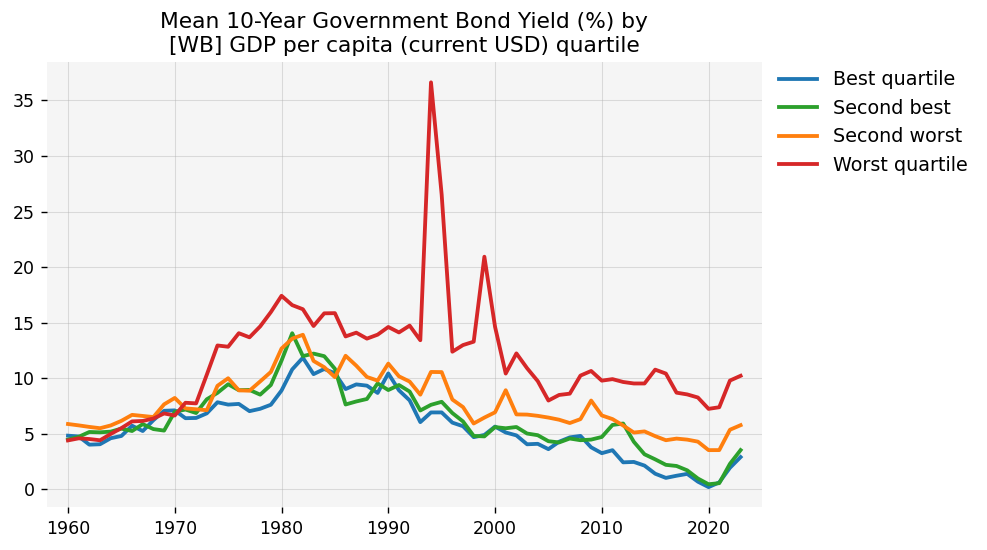

In [ ]:
# target per (IQ) variable quartiles

from functions.plot import target_timeseries_per_var_quartile

totals = {
        "fiw_total": "Overall Freedom Score (0–100)",
        "ief_overall_score": "Overall Economic Freedom Score (0–100)",
        "p5d_polity": "Polity Score (Democracy – Autocracy, range −10 to +10)",
        "wb_iq_spi_ovrl": "Social Progress Index – Overall Score (0–100)",
        "efw_economic_freedom_summary_index": "Economic Freedom Summary Index (0–10)",
        "wb_ny_gdp_pcap_cd": "GDP per capita (current USD)",
}

target_timeseries_per_var_quartile(df, target_col="tgt_spread", totals=totals)
target_timeseries_per_var_quartile(df, target_col="tgt_yield", totals=totals)

## Correlations

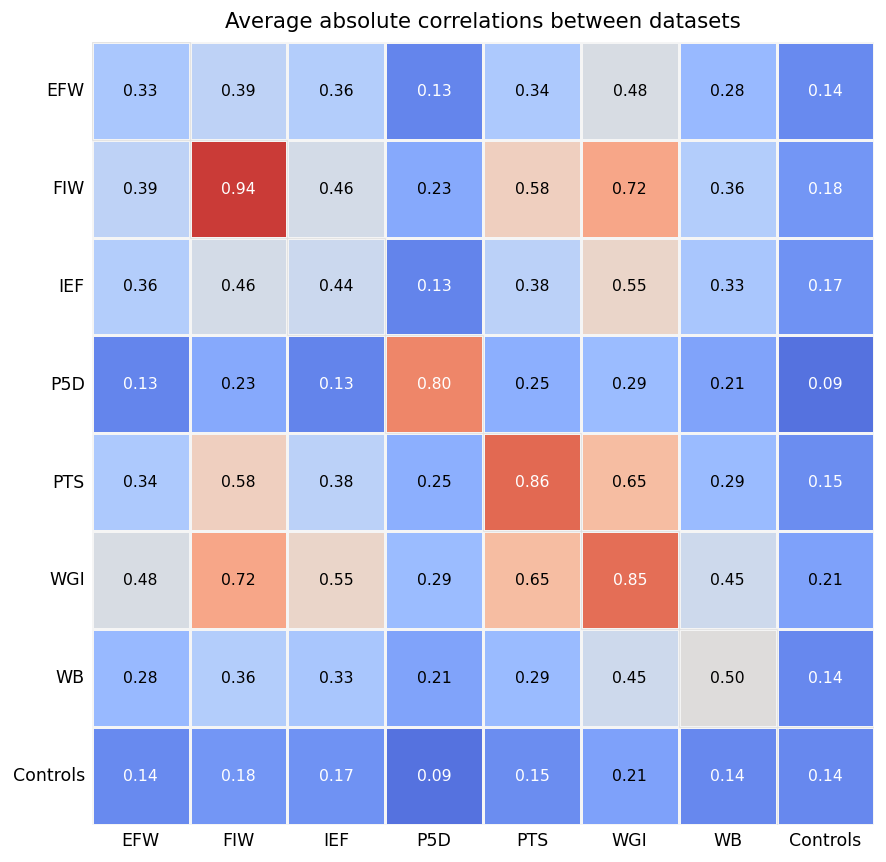

In [ ]:
# correlation heatmap by dataset

from functions.labels import *

label_dicts = {
    "efw": efw_labels,
    "fiw": fiw_labels,
    "ief": ief_labels,
    "p5d": p5d_labels,
    "pts": pts_labels,
    "wgi": wgi_labels,
    "wb": wb_iq_labels,
    "controls": controls_labels,
    # "tgt": tgt_labels
}

from functions.plot import correlation_across_datasets

M = correlation_across_datasets(df, label_dicts)

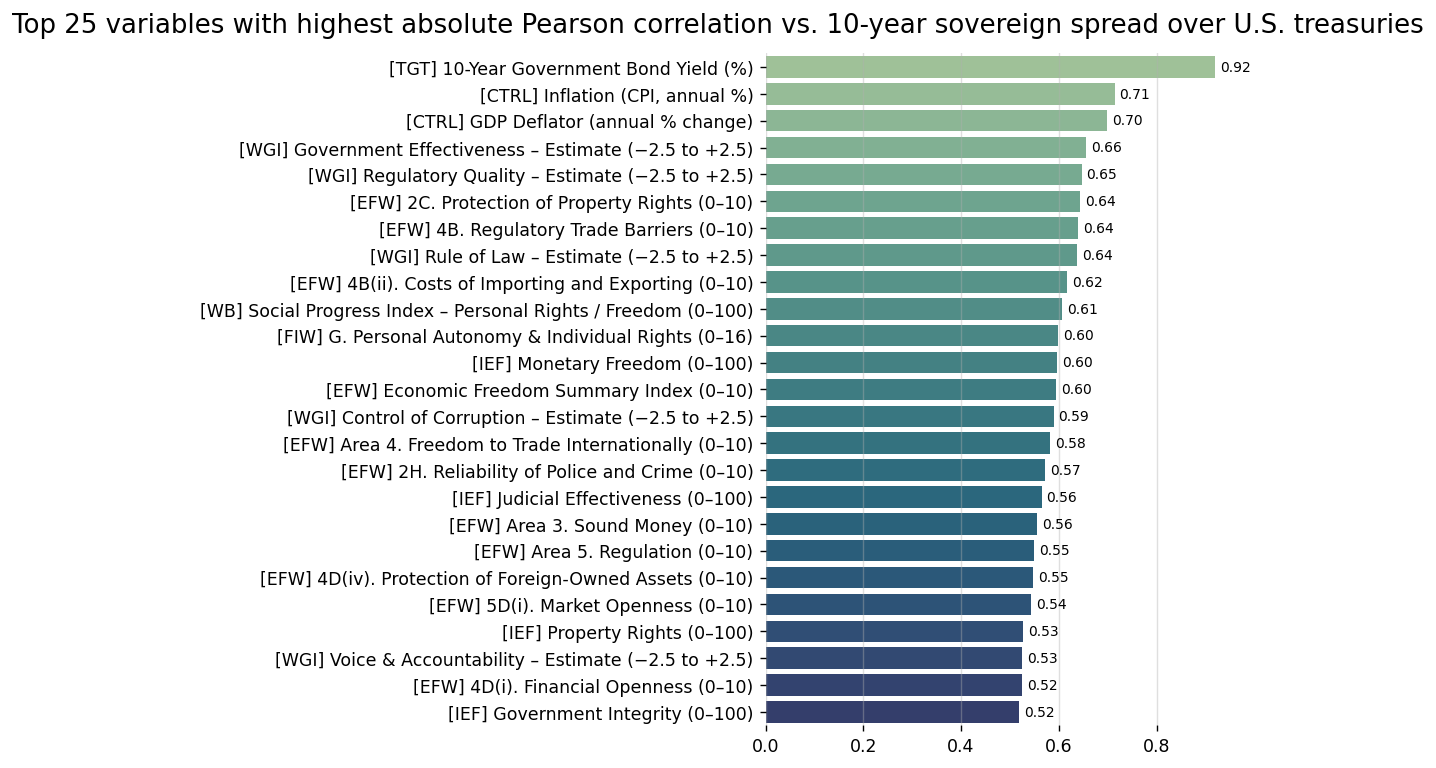

In [ ]:
# top variables correlated with target

from functions.labels import *

label_dicts = {
    "efw": efw_labels,
    "fiw": fiw_labels,
    "ief": ief_labels,
    "p5d": p5d_labels,
    "pts": pts_labels,
    "wgi": wgi_labels,
    "wb": wb_iq_labels,
    "controls": controls_labels,
    "tgt": tgt_labels
}

from functions.plot import top_correlations

corrs = top_correlations(df, label_dicts, target="tgt_spread", top_n=25)

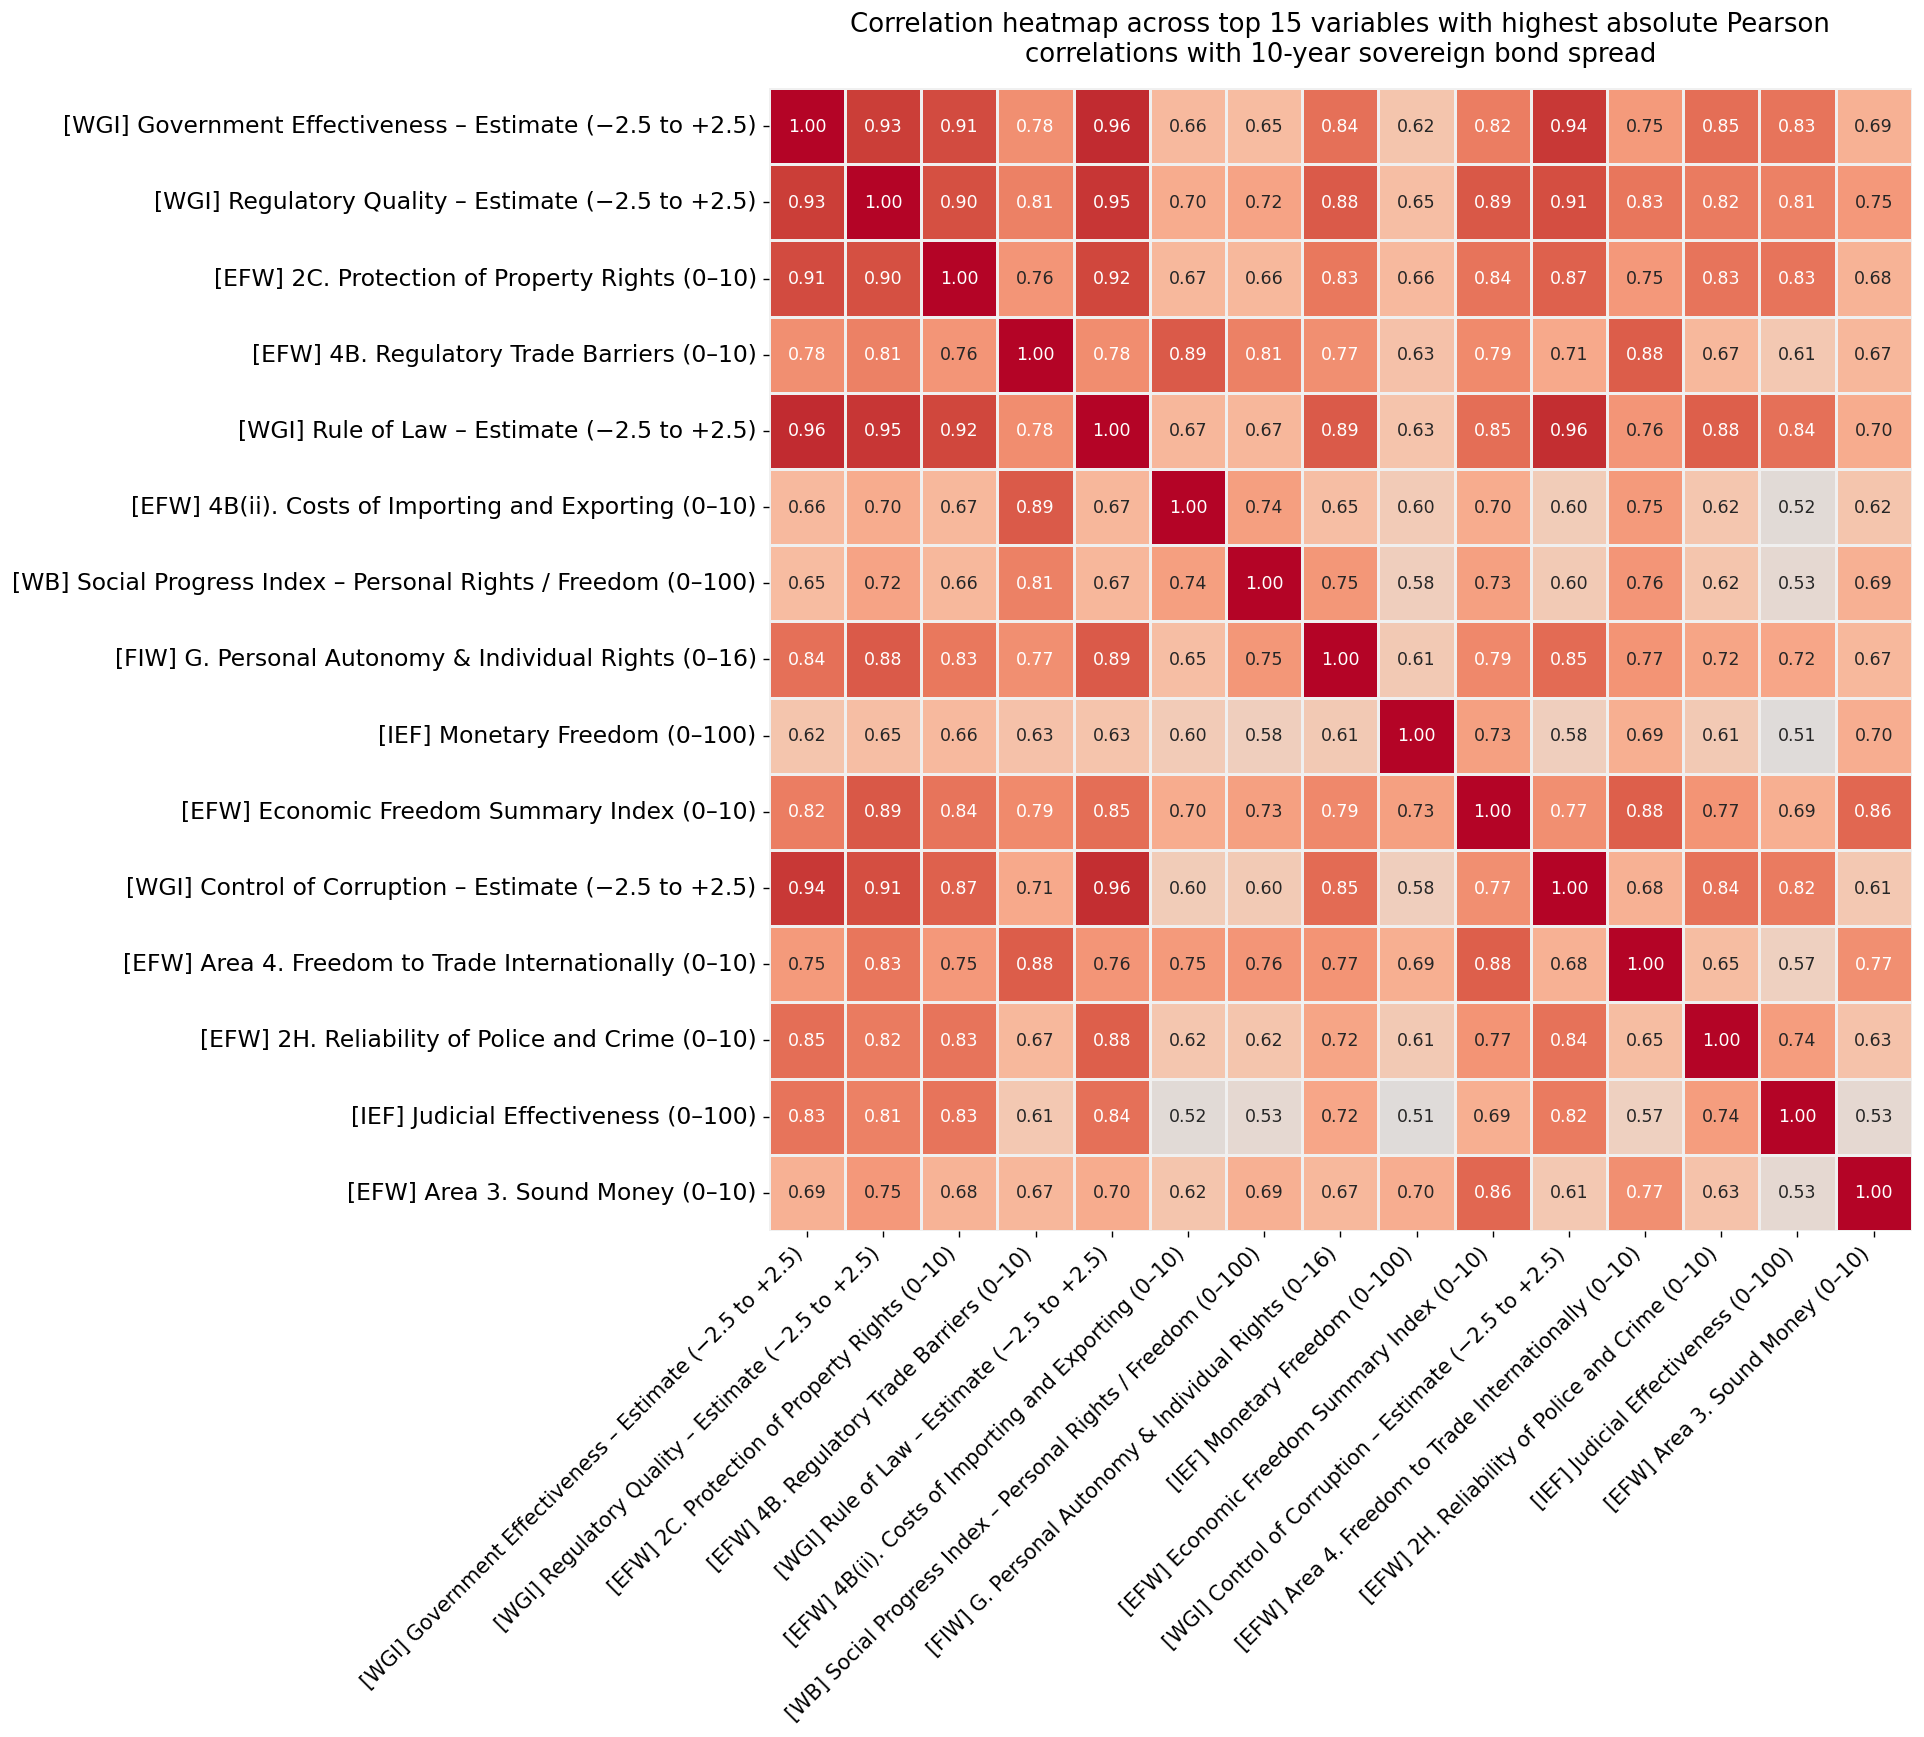

In [ ]:
# correlations across variables most correlated with target

from functions.labels import *

label_dicts={"efw":efw_labels,
             "fiw":fiw_labels,
             "ief":ief_labels,
             "p5d":p5d_labels,
             "pts":pts_labels,
             "wgi":wgi_labels,
             "wb":wb_iq_labels,
             "controls":controls_labels,
             #"tgt":tgt_labels
             }

from functions.plot import correlation_across_top_vars

corr = correlation_across_top_vars(df,
                                   label_dicts,
                                   target="tgt_spread",
                                   top_n=15,
                                   exclude_ctrl=True)

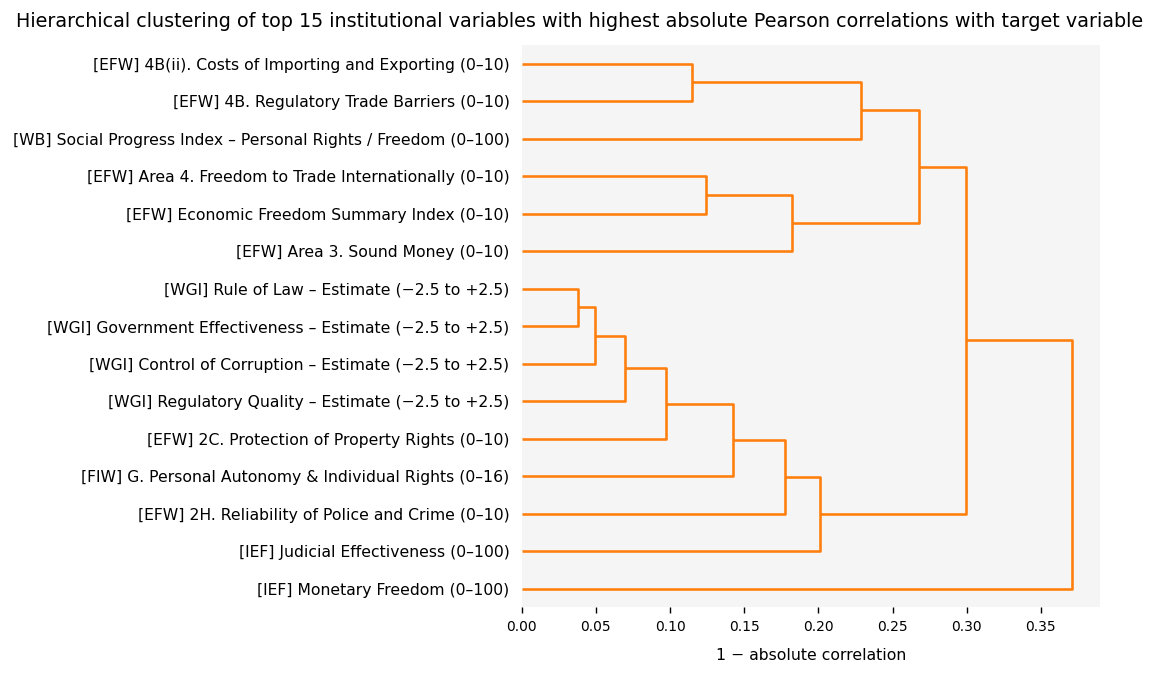

In [ ]:
# dendogram for vars most correlated with target

from functions.plot import dendrogram_for_top_vars

dendrogram_for_top_vars(corr, label_dicts)